# 1. PCA for Return Allocation

## 1.1. PCA on the NYSE

### 1.1.0. Importing Libraries

In [47]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages
from numpy.linalg import inv, eig, svd
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

### 1.1.1. Importing and Preparing the Data

In [48]:
# Import the data
nyse_df = pd.read_csv("NYSE_prices_split_adjusted.csv")
nyse_df.head()

date symbol        open       close         low        high   
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  \
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0

In [49]:
# Remove unnecessary columns
labels = ["open", "low", "high", "volume"]
nyse_df.drop(labels=labels, inplace=True, axis=1)
nyse_df.head()

date symbol       close
0  2016-01-05   WLTW  125.839996
1  2016-01-06   WLTW  119.980003
2  2016-01-07   WLTW  114.949997
3  2016-01-08   WLTW  116.620003
4  2016-01-11   WLTW  114.970001

In [50]:
# Pivot the dataframe
nyse_df = nyse_df.pivot(index="date", columns="symbol", values="close")
nyse_df.head()

symbol              A   AAL        AAP       AAPL  ABBV        ABC        ABT   
date                                                                            
2010-01-04  22.389128  4.77  40.380001  30.572857   NaN  26.629999  26.129884  \
2010-01-05  22.145923  5.31  40.139999  30.625713   NaN  26.440001  25.918773   
2010-01-06  22.067240  5.09  40.490002  30.138571   NaN  26.190001  26.062713   
2010-01-07  22.038626  5.24  40.480000  30.082857   NaN  25.770000  26.278623   
2010-01-08  22.031474  5.14  40.639999  30.282858   NaN  26.049999  26.412967   

symbol            ACN       ADBE        ADI  ...       XLNX        XOM   
date                                         ...                         
2010-01-04  42.070000  37.090000  31.670000  ...  25.379999  69.150002  \
2010-01-05  42.330002  37.700001  31.620001  ...  25.059999  69.419998   
2010-01-06  42.779999  37.619999  31.559999  ...  24.889999  70.019997   
2010-01-07  42.740002  36.889999  31.309999  ...  24.639999  69.800003   
2010-01-08  42.570000  36.689999  31.490000  ...  25.000000  69.519997   

symbol           XRAY   XRX  XYL       YHOO        YUM        ZBH   ZION  ZTS  
date                                                                           
2010-01-04  35.330002  8.63  NaN  17.100000  25.226457  60.020000  13.33  NaN  
2010-01-05  34.910000  8.64  NaN  17.230000  25.140187  61.919998  13.80  NaN  
2010-01-06  35.139999  8.56  NaN  17.170000  24.960462  61.900002  15.00  NaN  
2010-01-07  35.599998  8.60  NaN  16.700001  24.953272  63.320000  16.68  NaN  
2010-01-08  35.599998  8.57  NaN  16.700001  24.960462  61.990002  16.41  NaN  

[5 rows x 501 columns]

### 1.1.2. Descriptive Statistics

In [51]:
nyse_df.describe()

symbol            A          AAL          AAP         AAPL         ABBV   
count   1762.000000  1762.000000  1762.000000  1762.000000  1008.000000  \
mean      34.080221    23.873768   103.769597    79.402683    55.473641   
std        7.439467    15.557106    43.410717    28.330794     8.690668   
min       19.291845     4.000000    39.160000    27.435715    33.709999   
25%       27.687768     9.332500    66.465000    55.450000    49.315000   
50%       34.332382    17.225000    84.584999    78.435711    56.389999   
75%       40.559486    39.349998   148.100003   103.092503    62.309999   
max       48.439999    55.759998   200.380005   133.000000    71.230003   

symbol          ABC          ABT          ACN         ADBE          ADI  ...   
count   1762.000000  1762.000000  1762.000000  1762.000000  1762.000000  ...  \
mean      60.957747    34.628491    75.211884    55.247911    46.349637  ...   
std       25.974059     8.184385    23.328453    25.523074    11.165272  ...   
min       25.770000    21.667749    36.439999    22.690001    26.500000  ...   
25%       37.939999    25.973951    56.637501    32.619999    37.615001  ...   
50%       56.060000    35.849998    75.020001    45.720000    46.274999  ...   
75%       81.165001    41.454999    93.000000    76.289999    55.225000  ...   
max      115.480003    51.200001   125.400002   110.809998    74.529999  ...   

symbol         XLNX          XOM         XRAY          XRX          XYL   
count   1762.000000  1762.000000  1762.000000  1762.000000  1008.000000  \
mean      39.094001    84.006481    44.558087     9.992565    36.477470   
std        8.346671    10.255660     9.657220     1.823279     6.763168   
min       23.280001    56.570000    27.780001     6.230000    24.190001   
25%       32.619999    79.202497    36.572501     8.600000    33.345000   
50%       39.509998    86.005001    42.369999     9.940000    36.205000   
75%       46.097499    90.430000    51.985002    11.080000    38.179998   
max       61.240002   104.379997    65.139999    14.320000    54.750000   

symbol         YHOO          YUM          ZBH         ZION         ZTS  
count   1762.000000  1762.000000  1762.000000  1762.000000  987.000000  
mean      27.291992    48.223388    82.873859    25.069489   40.142432  
std       11.406846    10.432182    24.229881     5.020573    7.749647  
min       11.090000    23.522646    46.970001    13.330000   28.400000  
25%       15.920000    39.234365    60.842500    21.350000   32.169998  
50%       26.750000    50.413373    79.549999    25.140000   42.369999  
75%       37.377500    54.879586   103.482500    28.879999   47.145001  
max       52.369999    68.209925   133.089996    43.930000   55.380001  

[8 rows x 501 columns]

In [52]:
nyse_df.shape

(1762, 501)

### 1.1.3. Data Cleaning

In [53]:
# Checking for any null values and removing the null values
print('Null Values =',nyse_df.isnull().values.any())

Null Values = True


In [54]:
# Removing stocks that have more than 30% NaN values
nyse_df2 = nyse_df.copy()

missing_fractions = nyse_df2.isnull().mean().sort_values(ascending=False)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

nyse_df2.drop(labels=drop_list, axis=1, inplace=True)
nyse_df2.shape

(1762, 470)

I decided to not go through with removing stocks with >30% NaN values. It removed all stocks from the df that were founded after ~2012, including (but not limited to) some big names with a potentially large impac such as: NewsCorp (WSJ, The Times, etc...), Monster Beverages, and Mondelez. Instead, due to the narrow time frame of this dataset, all NaN values will be back filled, so a company added in 2012 @ \$35.68 will read \$35.68 up until that point. It will also take care of any random NaN values that occur later in the set and not effect the data too much.

In [55]:
# Fill the missing values with the last value available in the dataset.
nyse_df = nyse_df.fillna(method="bfill")
nyse_df.head()

symbol              A   AAL        AAP       AAPL       ABBV        ABC   
date                                                                      
2010-01-04  22.389128  4.77  40.380001  30.572857  35.119999  26.629999  \
2010-01-05  22.145923  5.31  40.139999  30.625713  35.119999  26.440001   
2010-01-06  22.067240  5.09  40.490002  30.138571  35.119999  26.190001   
2010-01-07  22.038626  5.24  40.480000  30.082857  35.119999  25.770000   
2010-01-08  22.031474  5.14  40.639999  30.282858  35.119999  26.049999   

symbol            ABT        ACN       ADBE        ADI  ...       XLNX   
date                                                    ...              
2010-01-04  26.129884  42.070000  37.090000  31.670000  ...  25.379999  \
2010-01-05  25.918773  42.330002  37.700001  31.620001  ...  25.059999   
2010-01-06  26.062713  42.779999  37.619999  31.559999  ...  24.889999   
2010-01-07  26.278623  42.740002  36.889999  31.309999  ...  24.639999   
2010-01-08  26.412967  42.570000  36.689999  31.490000  ...  25.000000   

symbol            XOM       XRAY   XRX   XYL       YHOO        YUM        ZBH   
date                                                                            
2010-01-04  69.150002  35.330002  8.63  27.5  17.100000  25.226457  60.020000  \
2010-01-05  69.419998  34.910000  8.64  27.5  17.230000  25.140187  61.919998   
2010-01-06  70.019997  35.139999  8.56  27.5  17.170000  24.960462  61.900002   
2010-01-07  69.800003  35.599998  8.60  27.5  16.700001  24.953272  63.320000   
2010-01-08  69.519997  35.599998  8.57  27.5  16.700001  24.960462  61.990002   

symbol       ZION    ZTS  
date                      
2010-01-04  13.33  31.01  
2010-01-05  13.80  31.01  
2010-01-06  15.00  31.01  
2010-01-07  16.68  31.01  
2010-01-08  16.41  31.01  

[5 rows x 501 columns]

In [56]:
# Daily Linear Returns (%)
nyse_dailyReturns = nyse_df.pct_change(1)
print(nyse_dailyReturns)

nyse_dailyReturns2 = nyse_dailyReturns.copy()
# Remove Outliers beyond 3 standard deviation
nyse_dailyReturns2 = nyse_dailyReturns2[nyse_dailyReturns2.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
print(nyse_dailyReturns2)

symbol             A       AAL       AAP      AAPL      ABBV       ABC   
date                                                                     
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN  \
2010-01-05 -0.010863  0.113208 -0.005944  0.001729  0.000000 -0.007135   
2010-01-06 -0.003553 -0.041431  0.008720 -0.015906  0.000000 -0.009455   
2010-01-07 -0.001297  0.029470 -0.000247 -0.001849  0.000000 -0.016037   
2010-01-08 -0.000325 -0.019084  0.003953  0.006648  0.000000  0.010865   
...              ...       ...       ...       ...       ...       ...   
2016-12-23  0.005003 -0.004313  0.002934  0.001978  0.011028  0.009639   
2016-12-27  0.006710  0.002682  0.005559  0.006351  0.002567  0.003310   
2016-12-28 -0.016986 -0.019338 -0.008263 -0.004264 -0.003680 -0.005963   
2016-12-29 -0.001750 -0.008811 -0.000821 -0.000257  0.007387  0.012636   
2016-12-30 -0.001753 -0.011852 -0.006812 -0.007796 -0.001754 -0.014495   

symbol           ABT       ACN      A

I decided against removing data outside of 3 standard deviations as it resulted in a drastic loss of data (1762x501 to 217x501). These outliers could be genuine data points caused by real events (market crashes, stock splitting, etc) rather than human error. Removing these could have a drastic impact on the performance of the PCA we are conducting, as such I have decided to leave them in.

### 1.1.4. Data Transformation

In [57]:
# Data needs to be on the same scale for PCA, data is being transformed to a standard normal distribution N(0,1).
PCA_scaler = StandardScaler().fit(nyse_dailyReturns)
rescaled_nyse_df = pd.DataFrame(PCA_scaler.fit_transform(nyse_dailyReturns), columns = nyse_dailyReturns.columns, index = nyse_dailyReturns.index)

# summarize transformed data
nyse_dailyReturns.dropna(how='any', inplace=True)
rescaled_nyse_df.dropna(how='any', inplace=True)
rescaled_nyse_df.head()

symbol             A       AAL       AAP      AAPL      ABBV       ABC   
date                                                                     
2010-01-05 -0.610114  3.629608 -0.401213  0.050610 -0.031668 -0.592207  \
2010-01-06 -0.220366 -1.406807  0.450828 -1.017351 -0.031668 -0.767623   
2010-01-07 -0.100060  0.902354 -0.070199 -0.166035 -0.031668 -1.265105   
2010-01-08 -0.048227 -0.678980  0.173828  0.348525 -0.031668  0.768415   
2010-01-11  0.003703 -0.691072 -0.627767 -0.588310 -0.031668  0.788610   

symbol           ABT       ACN      ADBE       ADI  ...      XLNX       XOM   
date                                                ...                       
2010-01-05 -0.717826  0.390625  0.883520 -0.136004  ... -0.822151  0.307053  \
2010-01-06  0.451858  0.706752 -0.160904 -0.155914  ... -0.460207  0.702288   
2010-01-07  0.686153 -0.114784 -1.132990 -0.532065  ... -0.662814 -0.280675   
2010-01-08  0.414003 -0.330911 -0.346488  0.321568  ...  0.869230 -0.353214   
2010-01-11  0.411772 -0.115119 -0.777398 -0.394358  ... -0.684924  0.917219   

symbol          XRAY       XRX       XYL      YHOO       YUM       ZBH   
date                                                                     
2010-01-05 -0.913594  0.052434 -0.036271  0.363085 -0.263589  2.200761  \
2010-01-06  0.463588 -0.506619 -0.036271 -0.215542 -0.505515 -0.051554   
2010-01-07  0.948242  0.241010 -0.036271 -1.462670 -0.060415  1.586892   
2010-01-08 -0.027492 -0.196941 -0.036271 -0.033764 -0.023040 -1.508171   
2010-01-11  0.935643  1.305194 -0.036271  0.091265  1.079371  1.527739   

symbol          ZION      ZTS  
date                           
2010-01-05  1.599148 -0.03295  
2010-01-06  4.005060 -0.03295  
2010-01-07  5.170535 -0.03295  
2010-01-08 -0.795042 -0.03295  
2010-01-11  0.241867 -0.03295  

[5 rows x 501 columns]

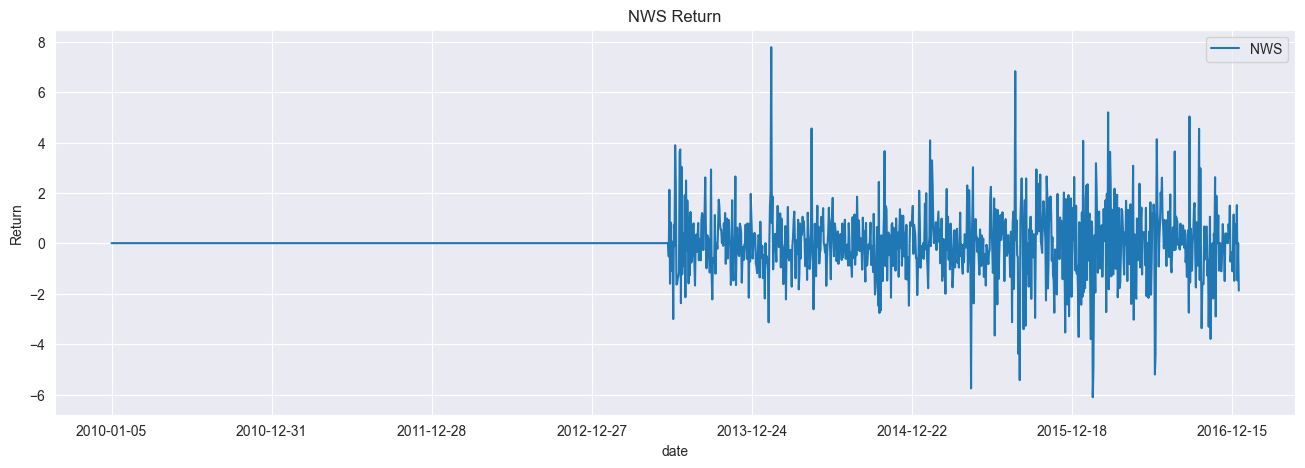

In [58]:
# Visualizing Log Returns for the NYSE closing price of an S&P 500 company
plt.figure(figsize=(16, 5))
plt.title("NWS Return")
plt.ylabel("Return")
rescaled_nyse_df.NWS.plot()
plt.grid(True);
plt.legend()
plt.show()

### 1.1.5. Algorithm Training

In [59]:
# Dividing the dataset into training and testing sets
nyse_percentage = int(len(rescaled_nyse_df) * 0.8)
X_train_nyse = rescaled_nyse_df[:nyse_percentage]
X_test_nyse = rescaled_nyse_df[nyse_percentage:]

X_train_raw_nyse = nyse_dailyReturns[:nyse_percentage]
X_test_raw_nyse = nyse_dailyReturns[nyse_percentage:]


nyse_stock_tickers = rescaled_nyse_df.columns.values
n_tickers_nyse = len(nyse_stock_tickers)

In [60]:
# Training PCA on the rescaled training data
nyse_pca = PCA()
PrincipalComponent = nyse_pca.fit(X_train_nyse)
print(nyse_pca.components_.shape)

(501, 501)


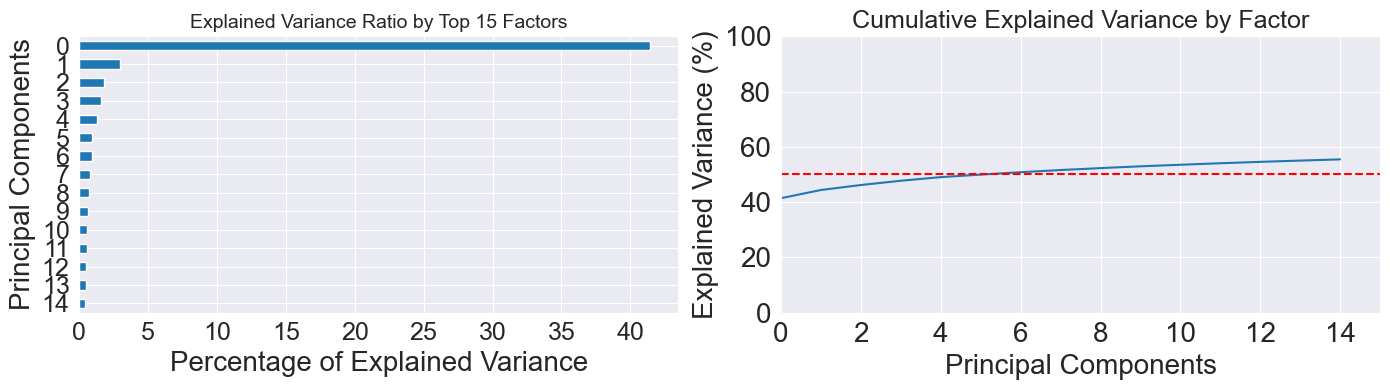

In [124]:
NumEigenvalues = 15

fig, axes = plt.subplots(ncols=2, figsize=(14,4))

# Bar plot showing the percentage of explained variance for each component
Series1 = pd.Series(nyse_pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series1.plot.barh(ax=axes[0], fontsize=18)
axes[0].set_title("Explained Variance Ratio by Top {} Factors".format(NumEigenvalues), fontsize=14)
axes[0].set_xlabel("Percentage of Explained Variance", fontsize=20)
axes[0].set_ylabel("Principal Components", fontsize=20)

# Line plot showing cumulative percentage of explained variance
Series2 = pd.Series(nyse_pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series2.plot(ax=axes[1], fontsize=20)
axes[1].set_title("Cumulative Explained Variance by Factor", fontsize=18)
axes[1].set_xlabel("Principal Components", fontsize=20)
axes[1].set_ylabel("Explained Variance (%)", fontsize=20)
axes[1].set_ylim(0, 100)
axes[1].set_xlim(0, NumEigenvalues)

# Add a horizontal line at y=90% for reference
axes[1].axhline(y=50, color='r', linestyle='--')

plt.tight_layout()
# explained_variance
pd.Series(np.cumsum(nyse_pca.explained_variance_ratio_)).to_frame("Explained Variance").head(NumEigenvalues).style.format("{:,.2%}".format)

Text(0.5, 1.0, 'Scatter Plot of First Two Principal Components')

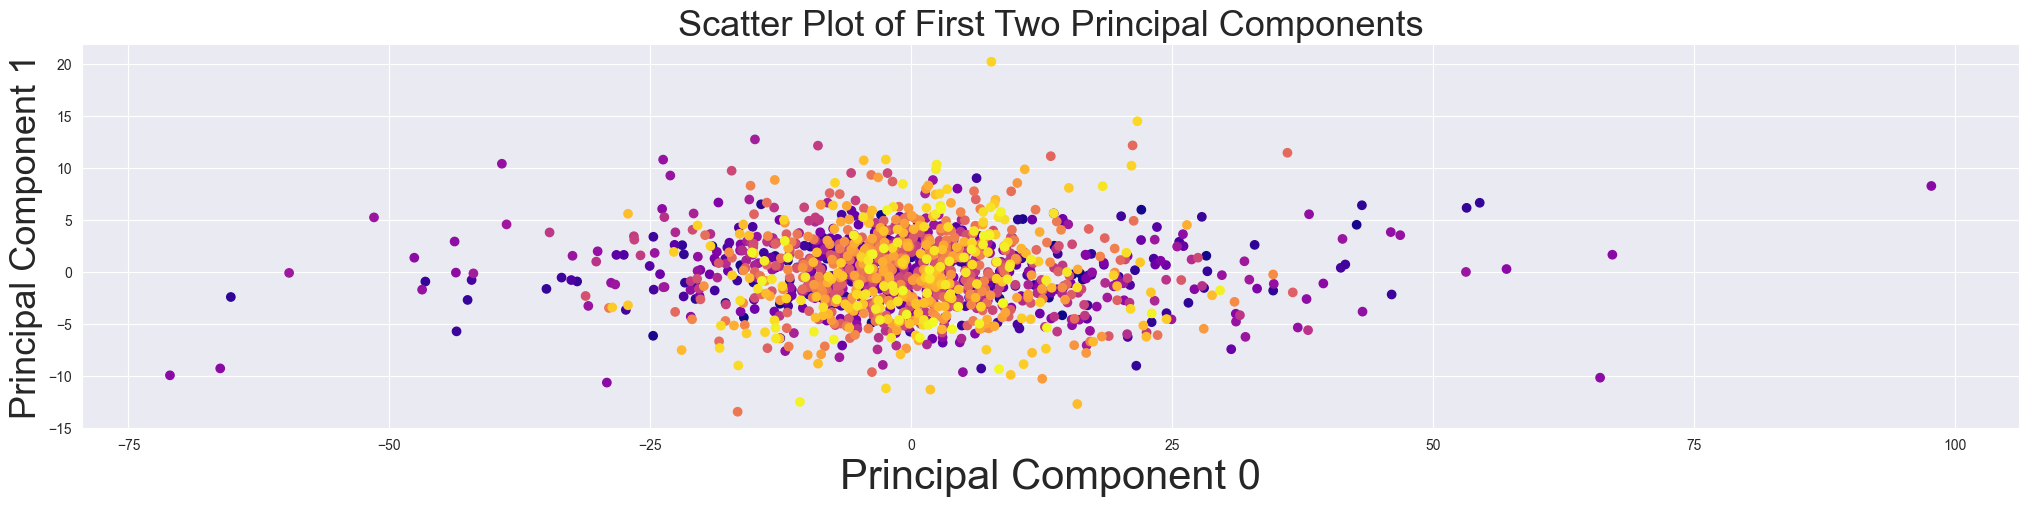

In [108]:
"""This is the scatter plot at a proper scale, and does well to show the variance explained by component 0. It is too large for the paper though so I will be producing a smaller one"""
# Transform the training set to 2D using the first two principal components
X_train_2d = nyse_pca.transform(X_train_nyse)[:, :2]

# Create a scatter plot of the first two principal components
fig, ax = plt.subplots(figsize=(25, 5))
ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=np.arange(len(X_train_2d)), cmap="plasma")
ax.set_xlabel("Principal Component 0", fontsize=30)
#ax.tick_params(labelsize=16) for some reason changing the tick size on this chart while plasma is used makes the background white
ax.set_ylabel("Principal Component 1", fontsize=26)
ax.set_title("Scatter Plot of First Two Principal Components", fontsize=26)

Text(0.5, 1.0, 'Scatter Plot of First Two Principal Components')

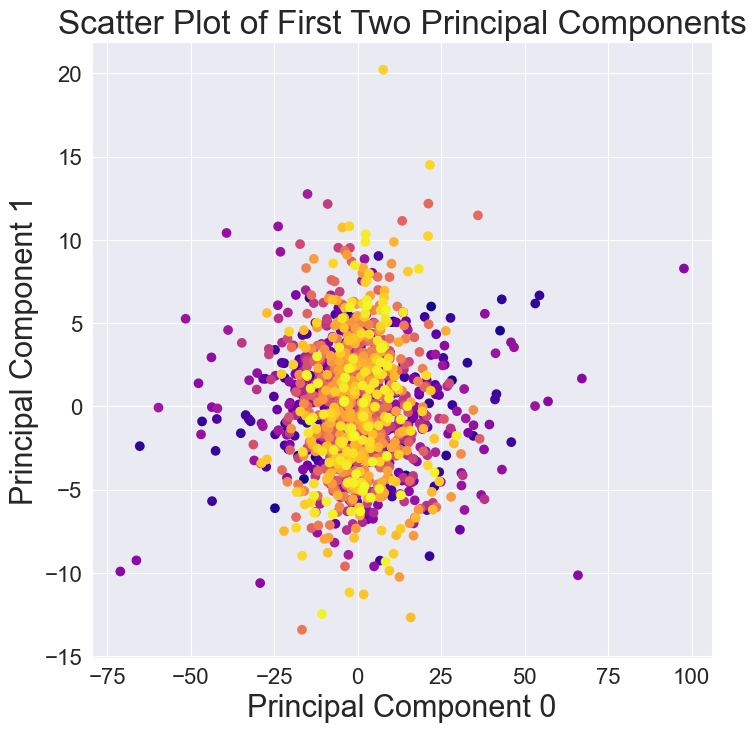

In [125]:
# Create a scatter plot of the first two principal components
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=np.arange(len(X_train_2d)), cmap="plasma")
ax.set_xlabel("Principal Component 0", fontsize=22)
ax.tick_params(labelsize=16)
ax.set_ylabel("Principal Component 1", fontsize=22)
ax.set_title("Scatter Plot of First Two Principal Components", fontsize=24)

It appears that the most important factor explains ~42% of the variance in the daily return percentage, with 10 factors explaining ~53% of the variance in the returns of this dataset.

### 1.1.6. Portfolio Weights

In [96]:
nyse_pca.components_[1]

array([ 3.98913336e-02,  6.39102971e-03,  9.92791614e-03,  2.62111827e-02,
       -1.90851831e-02, -1.15332289e-02, -4.03030286e-02,  1.71355855e-02,
        2.64316689e-02,  4.44381629e-02, -1.44194322e-02, -6.37681312e-03,
        1.60126311e-02,  3.89265455e-02, -1.43232817e-01, -1.51936797e-01,
       -5.50833020e-02, -4.22140570e-04,  1.08684365e-02, -8.50811641e-03,
        2.16796066e-02, -6.58404115e-02, -1.08905552e-02, -1.26673289e-02,
        3.63608419e-02,  3.94628013e-02,  1.31118159e-03, -1.56877702e-02,
        2.02116889e-02,  5.65961157e-03,  4.72157469e-02,  3.54663048e-02,
        3.16408492e-02, -2.93218864e-02,  2.76560158e-02, -3.74951183e-02,
        3.71536420e-02,  1.57477870e-02, -1.51184110e-03, -2.37822222e-03,
        2.94803120e-02,  2.81133125e-02,  1.00475031e-02,  2.82007478e-02,
        1.28712685e-02,  1.26085636e-02, -7.99130750e-02,  5.01021006e-02,
        1.53098253e-02, -9.95055529e-02,  3.95201984e-04,  1.73372279e-02,
       -8.75082504e-03,  

## 1.2. PCA on the Dow Jones Industrial Average (DJIA)

### 1.2.1 Importing and Visualising the Data

In [3]:
djia_df = pd.read_csv("Dow_adjcloses_2000_2019.csv", index_col=0)
djia_df.head()

MMM        AXP      AAPL         BA        CAT        CVX   
Date                                                                          
2000-01-03  29.847043  35.476634  3.530576  26.650218  14.560887  21.582046  \
2000-01-04  28.661131  34.134275  3.232839  26.610431  14.372251  21.582046   
2000-01-05  30.122175  33.959430  3.280149  28.473758  14.914205  22.049145   
2000-01-06  31.877325  33.959430  2.996290  28.553331  15.459153  22.903343   
2000-01-07  32.509812  34.433913  3.138219  29.382213  15.962182  23.305926   

                 CSCO         KO        DIS  DWDP  ...       NKE        PFE   
Date                                               ...                        
2000-01-03  43.003876  16.983583  23.522220   NaN  ...  4.701180  16.746856  \
2000-01-04  40.577200  17.040950  24.899860   NaN  ...  4.445214  16.121738   
2000-01-05  40.895453  17.228147  25.781550   NaN  ...  4.702157  16.415912   
2000-01-06  39.781569  17.210031  24.899860   NaN  ...  4.677733  16.972739   
2000-01-07  42.128682  18.342270  24.506249   NaN  ...  4.677733  18.123166   

                   PG        TRV        UTX       UNH         VZ   V   
Date                                                                   
2000-01-03  32.227726  20.158885  21.319030  5.841355  22.564221 NaN  \
2000-01-04  31.596399  19.890099  20.445803  5.766368  21.833915 NaN   
2000-01-05  31.325831  20.085579  20.254784  5.753327  22.564221 NaN   
2000-01-06  32.438168  20.122232  20.998392  5.964159  22.449405 NaN   
2000-01-07  35.023602  20.922479  21.830687  6.662948  22.282692 NaN   

                  WMT        WBA  
Date                              
2000-01-03  47.337599  21.713237  
2000-01-04  45.566248  20.907354  
2000-01-05  44.503437  21.097421  
2000-01-06  45.126952  20.527220  
2000-01-07  48.535033  21.051805  

[5 rows x 30 columns]

In [4]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
djia_df.describe()

MMM          AXP         AAPL           BA          CAT   
count  4804.000000  4804.000000  4804.000000  4804.000000  4804.000000  \
mean     86.768590    49.659383    49.106634    85.481517    56.697445   
std      53.941623    22.564051    55.020296    79.084514    34.663396   
min      25.140195     8.713025     0.827607    17.463252     9.247340   
25%      51.191601    34.078903     3.899987    37.406768    26.335348   
50%      63.513883    42.274116    23.316182    58.436552    53.047521   
75%     122.906370    66.815558    84.007174   112.996317    76.487605   
max     251.980826   112.420728   231.260273   411.110000   166.832487   

               CVX         CSCO           KO          DIS        DWDP  ...   
count  4804.000000  4804.000000  4804.000000  4804.000000  363.000000  ...  \
mean     61.735451    21.652896    24.983814    46.367724   64.897404  ...   
std      31.713863    10.074094    10.611235    32.733220    5.768347  ...   
min      17.565805     6.842430    11.698790    11.018313   49.090000  ...   
25%      31.820217    14.910132    15.419998    22.044106   62.249826  ...   
50%      56.941779    18.577993    20.563342    29.521283   66.586254  ...   
75%      91.687905    24.649935    34.927140    75.833054   69.143042  ...   
max     128.679825    63.698248    50.400000   117.972904   75.261152  ...   

               NKE          PFE           PG          TRV          UTX   
count  4804.000000  4804.000000  4804.000000  4804.000000  4804.000000  \
mean     23.724266    20.736962    49.959573    55.961115    62.208919   
std      20.987536     7.629779    19.769481    34.644166    32.626864   
min       2.594833     8.041066    16.203766    13.286538    14.520547   
25%       8.036966    15.030615    35.413562    29.906759    34.328042   
50%      14.146826    18.643331    46.734628    39.823712    55.714581   
75%      36.544526    25.402775    68.134961    80.767355    92.557058   
max      85.300186    45.841240    98.030000   146.564192   141.279565   

               UNH           VZ            V          WMT          WBA  
count  4804.000000  4804.000000  2741.000000  4804.000000  4804.000000  
mean     64.417705    27.193436    53.323035    50.766604    41.696637  
std      62.920008    11.973258    37.647367    17.039732    19.937069  
min       5.175169    11.209926     9.846111    30.747677    17.317194  
25%      23.498173    17.433612    18.958517    38.062387    27.704467  
50%      42.923977    21.556066    45.207207    42.782495    32.705776  
75%      73.170959    38.995728    76.966054    65.076409    58.164790  
max     286.330000    60.016174   150.524693   107.009557    90.187639  

[8 rows x 30 columns]

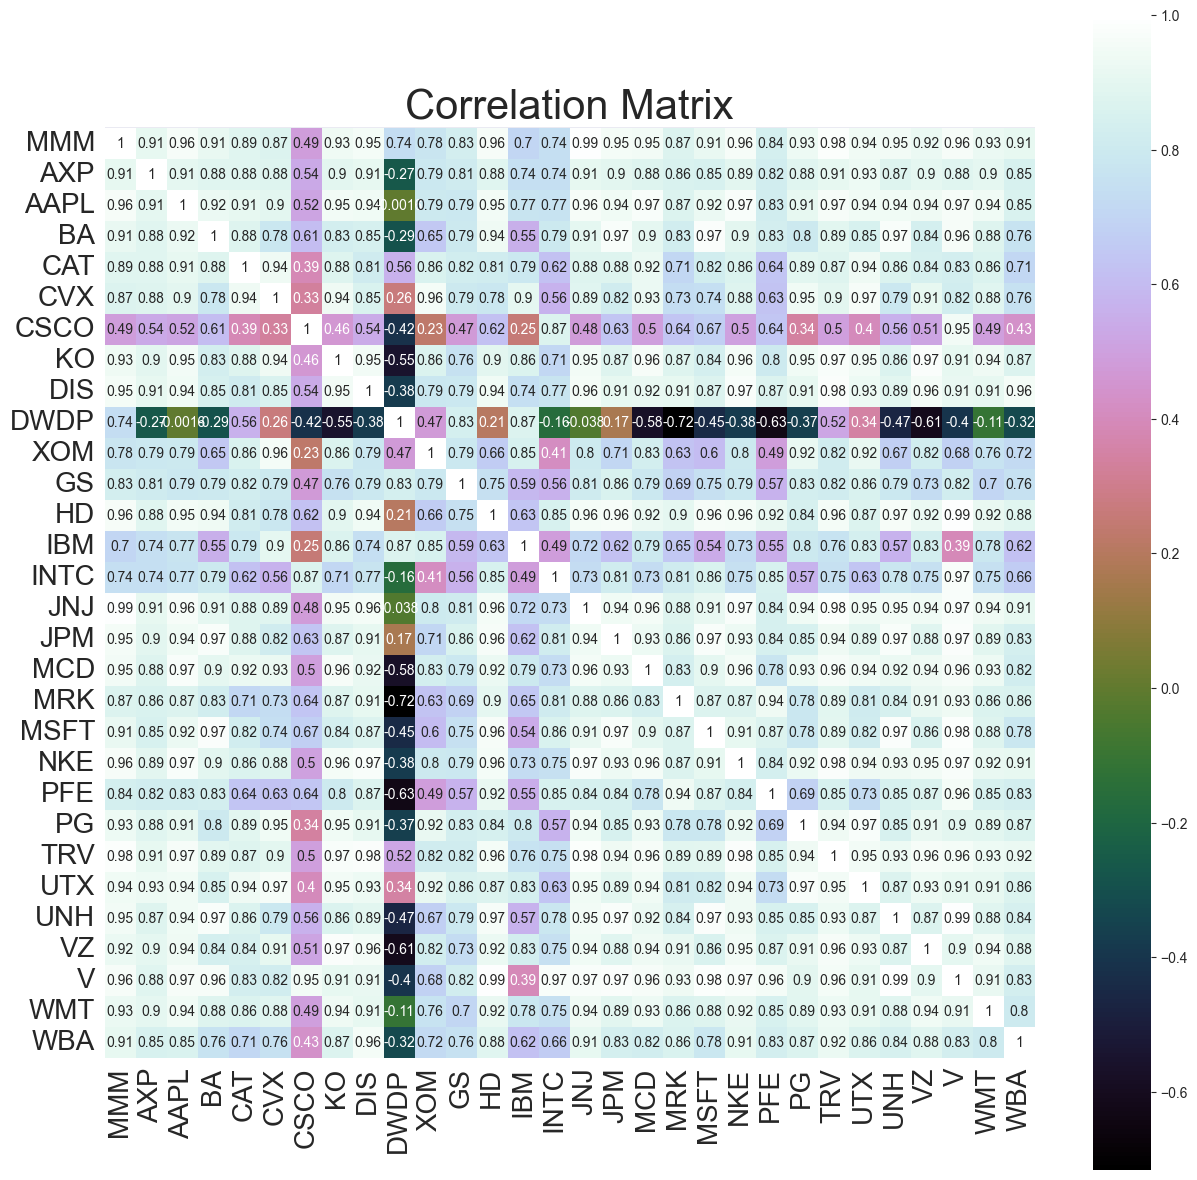

In [6]:
# correlation
djia_correlation = djia_df.corr()
plt.figure(figsize=(15,15))
plt.title("Correlation Matrix", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(djia_correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.savefig("Correlation Matrix.png", dpi=300)

### 1.2.2. Data Preperation

In [7]:
# Checking for any null values and removing the null values
print("Null Values =", djia_df.isnull().values.any())

Null Values = True


In [8]:
# Dropping columns where more than 30% of the rows have NaN values
djia_missing_fractions = djia_df.isnull().mean().sort_values(ascending=False)

djia_missing_fractions.head(10)

drop_list = sorted(list(djia_missing_fractions[djia_missing_fractions > 0.3].index))

djia_df.drop(labels=drop_list, axis=1, inplace=True)
djia_df.shape

(4804, 28)

In [9]:
# Fill the missing values with the next value available in the dataset.
djia_df = djia_df.fillna(method="ffill")
djia_df = djia_df.dropna(axis=0)
djia_df.head()

MMM        AXP      AAPL         BA        CAT        CVX   
Date                                                                          
2000-01-03  29.847043  35.476634  3.530576  26.650218  14.560887  21.582046  \
2000-01-04  28.661131  34.134275  3.232839  26.610431  14.372251  21.582046   
2000-01-05  30.122175  33.959430  3.280149  28.473758  14.914205  22.049145   
2000-01-06  31.877325  33.959430  2.996290  28.553331  15.459153  22.903343   
2000-01-07  32.509812  34.433913  3.138219  29.382213  15.962182  23.305926   

                 CSCO         KO        DIS        XOM  ...       MSFT   
Date                                                    ...              
2000-01-03  43.003876  16.983583  23.522220  23.862240  ...  38.135101  \
2000-01-04  40.577200  17.040950  24.899860  23.405167  ...  36.846046   
2000-01-05  40.895453  17.228147  25.781550  24.569179  ...  37.235380   
2000-01-06  39.781569  17.210031  24.899860  25.958680  ...  35.988857   
2000-01-07  42.128682  18.342270  24.506249  25.882501  ...  36.459983   

                 NKE        PFE         PG        TRV        UTX       UNH   
Date                                                                         
2000-01-03  4.701180  16.746856  32.227726  20.158885  21.319030  5.841355  \
2000-01-04  4.445214  16.121738  31.596399  19.890099  20.445803  5.766368   
2000-01-05  4.702157  16.415912  31.325831  20.085579  20.254784  5.753327   
2000-01-06  4.677733  16.972739  32.438168  20.122232  20.998392  5.964159   
2000-01-07  4.677733  18.123166  35.023602  20.922479  21.830687  6.662948   

                   VZ        WMT        WBA  
Date                                         
2000-01-03  22.564221  47.337599  21.713237  
2000-01-04  21.833915  45.566248  20.907354  
2000-01-05  22.564221  44.503437  21.097421  
2000-01-06  22.449405  45.126952  20.527220  
2000-01-07  22.282692  48.535033  21.051805  

[5 rows x 28 columns]

In [10]:
# Calculating Daily Linear Returns (%)
djia_dailyReturns = djia_df.pct_change(1)
print(djia_dailyReturns)

#Remove Outliers beyong 3 standard deviation
djia_dailyReturns = djia_dailyReturns[djia_dailyReturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
print(djia_dailyReturns)

                 MMM       AXP      AAPL        BA       CAT       CVX   
Date                                                                     
2000-01-03       NaN       NaN       NaN       NaN       NaN       NaN  \
2000-01-04 -0.039733 -0.037838 -0.084331 -0.001493 -0.012955  0.000000   
2000-01-05  0.050976 -0.005122  0.014634  0.070022  0.037708  0.021643   
2000-01-06  0.058268  0.000000 -0.086538  0.002795  0.036539  0.038741   
2000-01-07  0.019841  0.013972  0.047368  0.029029  0.032539  0.017577   
...              ...       ...       ...       ...       ...       ...   
2019-01-31  0.005169  0.000292  0.007201 -0.005416  0.023442  0.014512   
2019-02-01 -0.005691  0.003505  0.000481  0.004694 -0.016897  0.032447   
2019-02-04  0.005272  0.003493  0.028405  0.024701 -0.000229  0.011574   
2019-02-05  0.004545  0.004641  0.017109  0.033199  0.008557 -0.002171   
2019-02-06  0.007210  0.010202  0.000344  0.002267 -0.011061 -0.005022   

                CSCO        KO       

### 1.2.3. Data Transformation

In [11]:
# Rescaling the data to a standard normal distribution N(0,1)
djia_scaler = StandardScaler().fit(djia_dailyReturns)
rescaled_djia_df = pd.DataFrame(djia_scaler.fit_transform(djia_dailyReturns), columns = djia_dailyReturns.columns, index = djia_dailyReturns.index)
# summarize transformed data
djia_dailyReturns.dropna(how='any', inplace=True)
rescaled_djia_df.dropna(how='any', inplace=True)
rescaled_djia_df.head(2)

MMM       AXP      AAPL        BA       CAT       CVX   
Date                                                                     
2000-01-11 -1.713383  0.565603 -2.707674 -1.133045 -1.041247 -0.787063  \
2000-01-20 -3.564118  1.077343  3.304005 -1.670108 -2.833568 -0.445782   

                CSCO        KO       DIS       XOM  ...      MSFT       NKE   
Date                                                ...                       
2000-01-11 -1.834413  3.568833  0.725353  0.981056  ... -1.936268  3.666524  \
2000-01-20  0.021934  0.987042 -2.415069 -1.897394  ... -0.733208 -1.816361   

                 PFE        PG       TRV       UTX       UNH        VZ   
Date                                                                     
2000-01-11 -0.172523  1.771791 -0.936081 -1.954189  0.076018 -0.836288  \
2000-01-20 -1.420880 -2.741513 -0.475716 -1.915682  1.653794  0.241016   

                 WMT       WBA  
Date                            
2000-01-11 -1.374665  2.942150  
2000-01-20 -0.987037 -0.035748  

[2 rows x 28 columns]

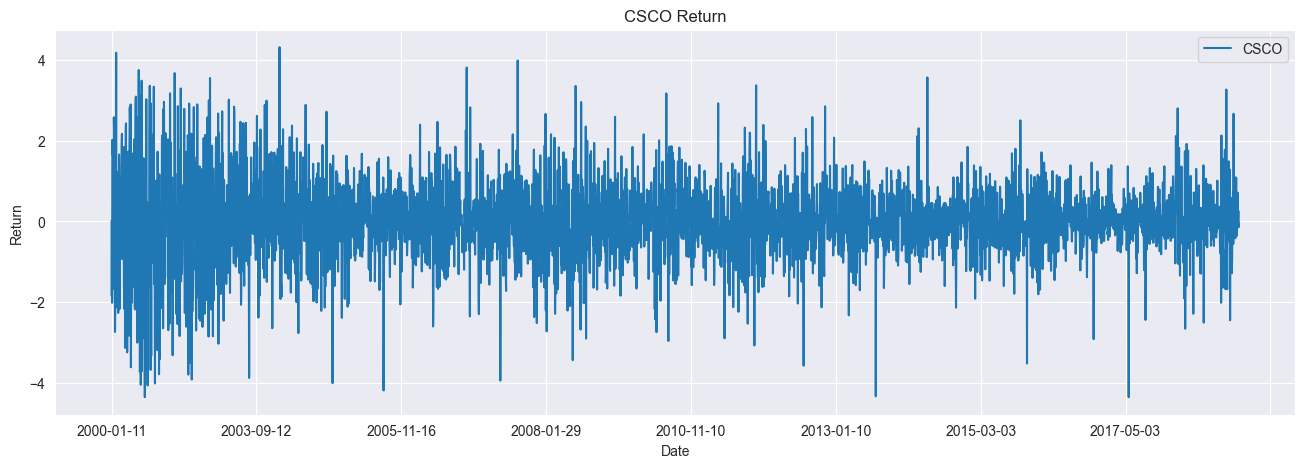

In [12]:
# Visualizing normalised returns for CSCO
plt.figure(figsize=(16, 5))
plt.title("CSCO Return")
plt.ylabel("Return")
rescaled_djia_df.CSCO.plot()
plt.grid(True);
plt.legend()
plt.show()

### 1.2.4 Training the PCA Model

In [13]:
# Dividing the dataset into training and testing sets
djia_percentage = int(len(rescaled_djia_df) * 0.8)
X_train_djia = rescaled_djia_df[:djia_percentage]
X_test_djia = rescaled_djia_df[djia_percentage:]

X_train_raw_djia = djia_dailyReturns[:djia_percentage]
X_test_raw_djia = djia_dailyReturns[djia_percentage:]


djia_stock_tickers = rescaled_djia_df.columns.values
n_tickers_djia = len(djia_stock_tickers)

In [14]:
# Training PCA on the rescaled training data
djia_pca = PCA()
djia_PrincipalComponent = djia_pca.fit(X_train_djia)
print(djia_pca.components_.shape)

(28, 28)


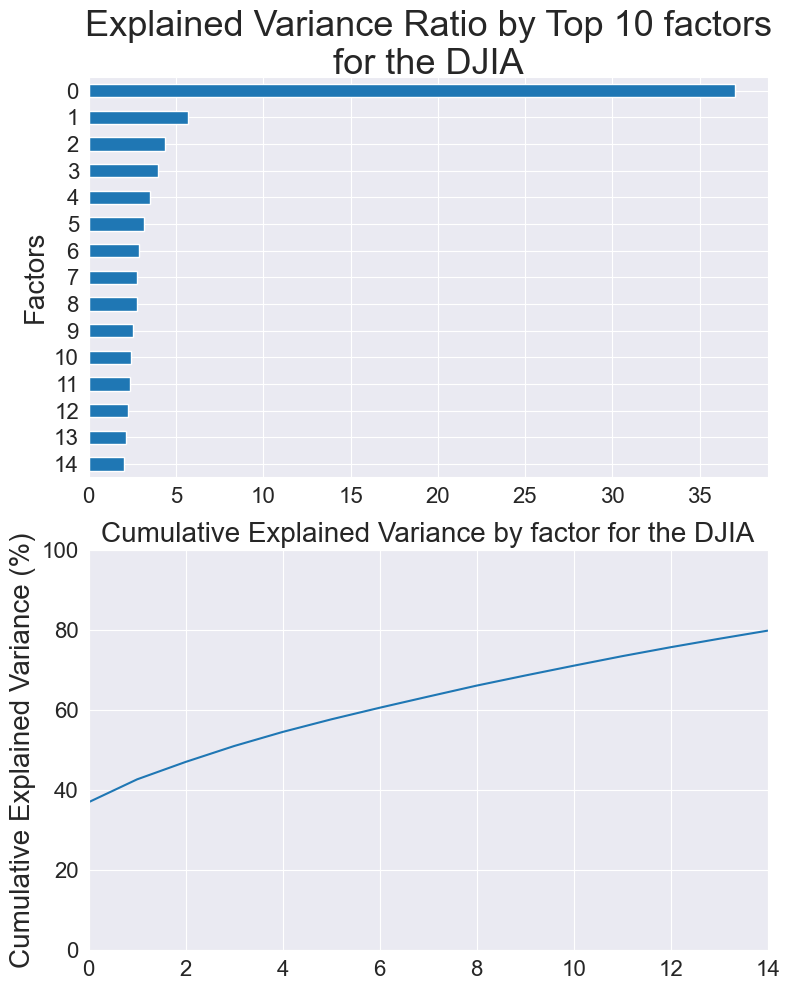

In [39]:
NumEigenvalues = 15
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8, 10))
djia_Series1 = pd.Series(djia_pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
djia_Series2 = pd.Series(djia_pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
# djia_Series1.plot.barh(ylim=(0,9), label="woohoo", title="Explained Variance Ratio by Top 10 factors for the DJIA", ax=axes[0]);
# djia_Series2.plot(ylim=(0,100), xlim=(0,9),ax=axes[1], title="Cumulative Explained Variance by factor for the DJIA");

# subplot 1
axes[0].set_title("Explained Variance Ratio by Top 10 factors for the DJIA", fontsize=26, wrap=True)
axes[0].set_xlabel("Explained Variance Ratio (%)", fontsize=20)
axes[0].set_ylabel("Factors", fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=16)
djia_Series1.plot.barh(ylim=(0,9), label="woohoo", ax=axes[0])

#subplot 2
axes[1].set_title("Cumulative Explained Variance by factor for the DJIA", fontsize=20, wrap=True)
axes[1].set_ylabel("Cumulative Explained Variance (%)", fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=16)
djia_Series2.plot(ylim=(0,100), xlim=(0,14),ax=axes[1])

plt.tight_layout()

# Add a horizontal line at y=90% for reference
axes[1].axhline(y=52.95, color='r', linestyle='--')

# explained_variance
pd.Series(np.cumsum(djia_pca.explained_variance_ratio_)).to_frame("Explained Variance").head(NumEigenvalues).style.format("{:,.2%}".format)

It appears that the most important factor explains ~37% of the variance in the daily return percentage, with 15 factors explaining ~80% of the variance in the returns of this dataset.

### 1.2.5. Portfolio Weights

In [40]:
def djia_PCWeights():
    """
    Principal Components (PC) weights for each 28 PCs
    """
    weights = pd.DataFrame()

    for i in range(len(djia_pca.components_)):
        # Normalisation
        weights["weights_{}".format(i)] = djia_pca.components_[i] / sum(djia_pca.components_[i])

    weights = weights.values.T
    return weights

djia_weights = djia_PCWeights()

In [41]:
djia_weights[1]

array([ 0.08329794, -0.31506441, -1.14948299, -0.042949  , -0.2920129 ,
        0.44303149, -1.23476536,  0.84949358, -0.3132726 ,  0.51798862,
       -0.56628137, -0.04038526, -0.62233053, -1.14499381,  1.19818527,
       -0.43965445,  0.3723801 ,  1.04736708, -0.7246247 , -0.00828187,
        0.79813911,  1.02945531,  0.161256  , -0.14361483,  0.57871055,
        0.27816447,  0.25583637,  0.42440818])

In [42]:
djia_pca.components_[1]

array([-0.02391164,  0.09044288,  0.32997237,  0.01232901,  0.08382568,
       -0.12717731,  0.35445366, -0.24385695,  0.08992852, -0.14869462,
        0.16255761,  0.01159305,  0.17864717,  0.3286837 , -0.34395292,
        0.12620789, -0.10689601, -0.30065882,  0.20801189,  0.00237741,
       -0.22911505, -0.29551704, -0.0462904 ,  0.0412263 , -0.16612555,
       -0.07985032, -0.07344079, -0.12183127])

MMM       AXP      AAPL        BA       CAT       CVX      CSCO   
0 -0.227822 -0.228358 -0.153028 -0.189699 -0.202000 -0.178106 -0.195081  \
1 -0.023912  0.090443  0.329972  0.012329  0.083826 -0.127177  0.354454   
2 -0.132978 -0.007417  0.054094 -0.160522 -0.275183 -0.510884  0.121975   
3  0.020452  0.295343 -0.289849  0.124549  0.044037 -0.216371 -0.223820   
4 -0.128942  0.176968 -0.046768 -0.165941 -0.152630 -0.049146  0.049341   

         KO       DIS       XOM  ...      MSFT       NKE       PFE        PG   
0 -0.168453 -0.208204 -0.193085  ... -0.193673 -0.171188 -0.189933 -0.168060  \
1 -0.243857  0.089929 -0.148695  ...  0.208012  0.002377 -0.229115 -0.295517   
2  0.130409  0.053872 -0.464791  ...  0.112534  0.066287  0.117683  0.142559   
3 -0.149086  0.057387 -0.249849  ... -0.240261  0.160990 -0.145305 -0.085368   
4 -0.140512  0.012105 -0.049278  ...  0.058591 -0.274011  0.341266 -0.167605   

        TRV       UTX       UNH        VZ       WMT       WBA  
0 -0.197612 -0.226590 -0.138213 -0.166888 -0.168978 -0.160708  
1 -0.046290  0.041226 -0.166126 -0.079850 -0.073441 -0.121831  
2 -0.034798 -0.171249 -0.067408  0.138508  0.318069  0.170962  
3  0.239176  0.071157  0.049851 -0.033902  0.096721  0.083708  
4  0.126083 -0.147708  0.078928  0.128431 -0.223797 -0.207154  

[5 rows x 28 columns]

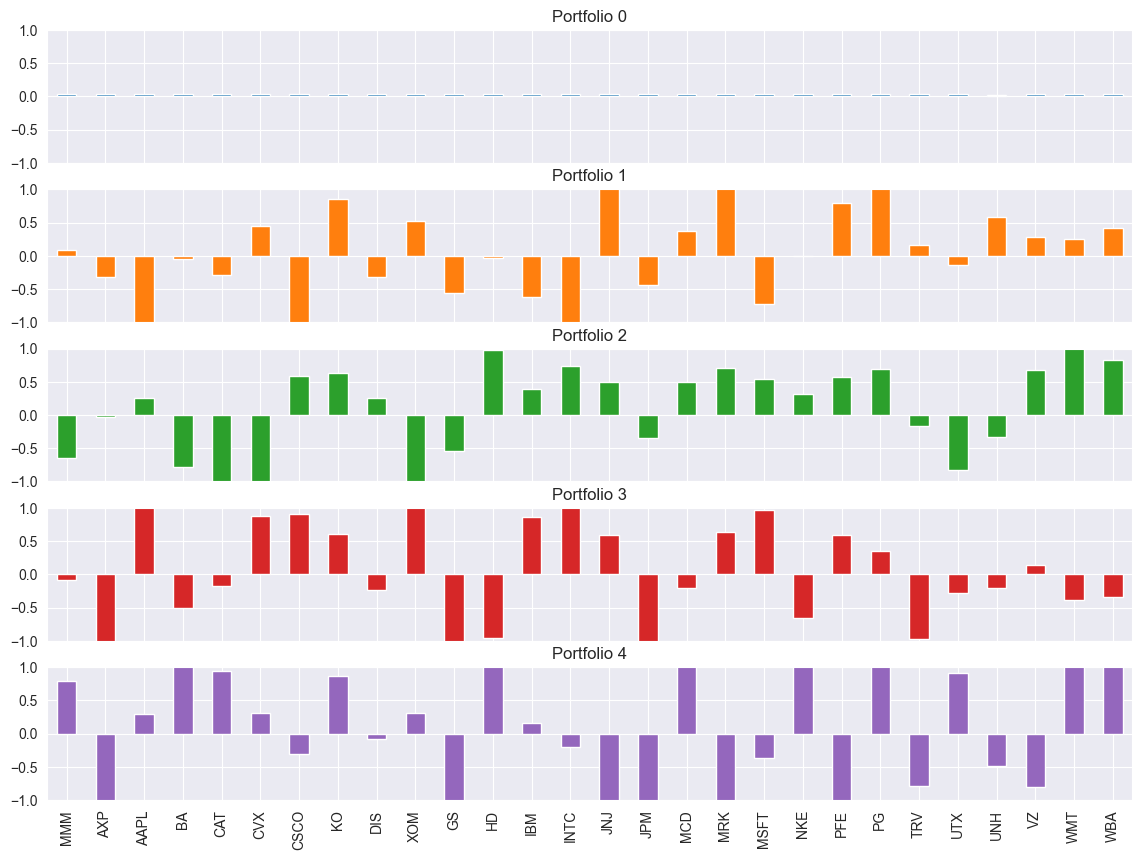

In [43]:
# Defining the numbeer N to produce the top N portfolios
NumComponents = 5

# Constrution the top 5 eigen portfolios
djia_topPortfolios = pd.DataFrame(djia_pca.components_[:NumComponents], columns=djia_df.columns)
djia_eigen_portfolios = djia_topPortfolios.div(djia_topPortfolios.sum(1), axis=0)
djia_eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)]

# Plotting the portfolios and their components
djia_eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))
djia_topPortfolios

<Axes: >

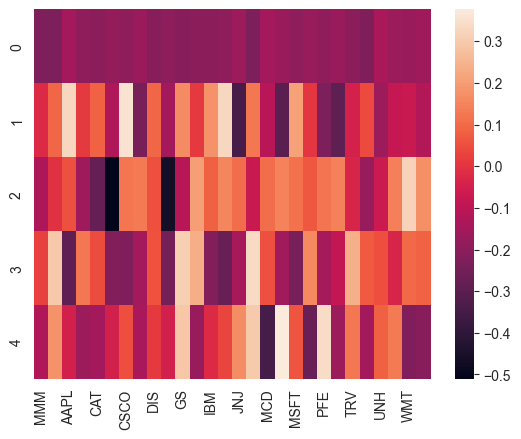

In [44]:
# plotting heatmap to show the contribution of each component to each eigenvector
sns.heatmap(djia_topPortfolios)

### 1.2.6. Determining the best Eigen Portfolio

In [45]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    """
    Function to define the Sharpe ratio
    """
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1 #this was giving an error to do with the power
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

Eigen portfolio #0 with the highest Sharpe. Return 11.51%, vol = 13.44%, Sharpe = 0.86
      Return        Vol    Sharpe
0   0.115081   0.134381  0.856378
10  0.501397   0.925636  0.541679
5   0.319541   1.132073  0.282262
18 -1.000000  20.809336 -0.048055
7  -0.086041   0.813490 -0.105768
22 -1.000000   7.209636 -0.138703
4  -0.219639   1.323988 -0.165892
23 -0.999969   4.328761 -0.231006
21 -0.240775   1.013485 -0.237572
3  -0.261668   1.037550 -0.252197
25 -0.999806   3.935996 -0.254016
8  -0.402225   1.575144 -0.255358
6  -0.507071   1.889336 -0.268386
19 -0.998997   3.242894 -0.308057
27 -0.384183   1.177426 -0.326291
26 -0.991609   3.010419 -0.329393
17 -0.961202   2.785406 -0.345085
24 -0.445004   1.275971 -0.348757
13 -0.506670   1.400176 -0.361862
16 -0.969198   2.311073 -0.419371
14 -0.944634   2.212637 -0.426927
1  -0.470548   1.043887 -0.450766
20 -0.765249   1.615249 -0.473765
2  -0.641411   1.120976 -0.572190


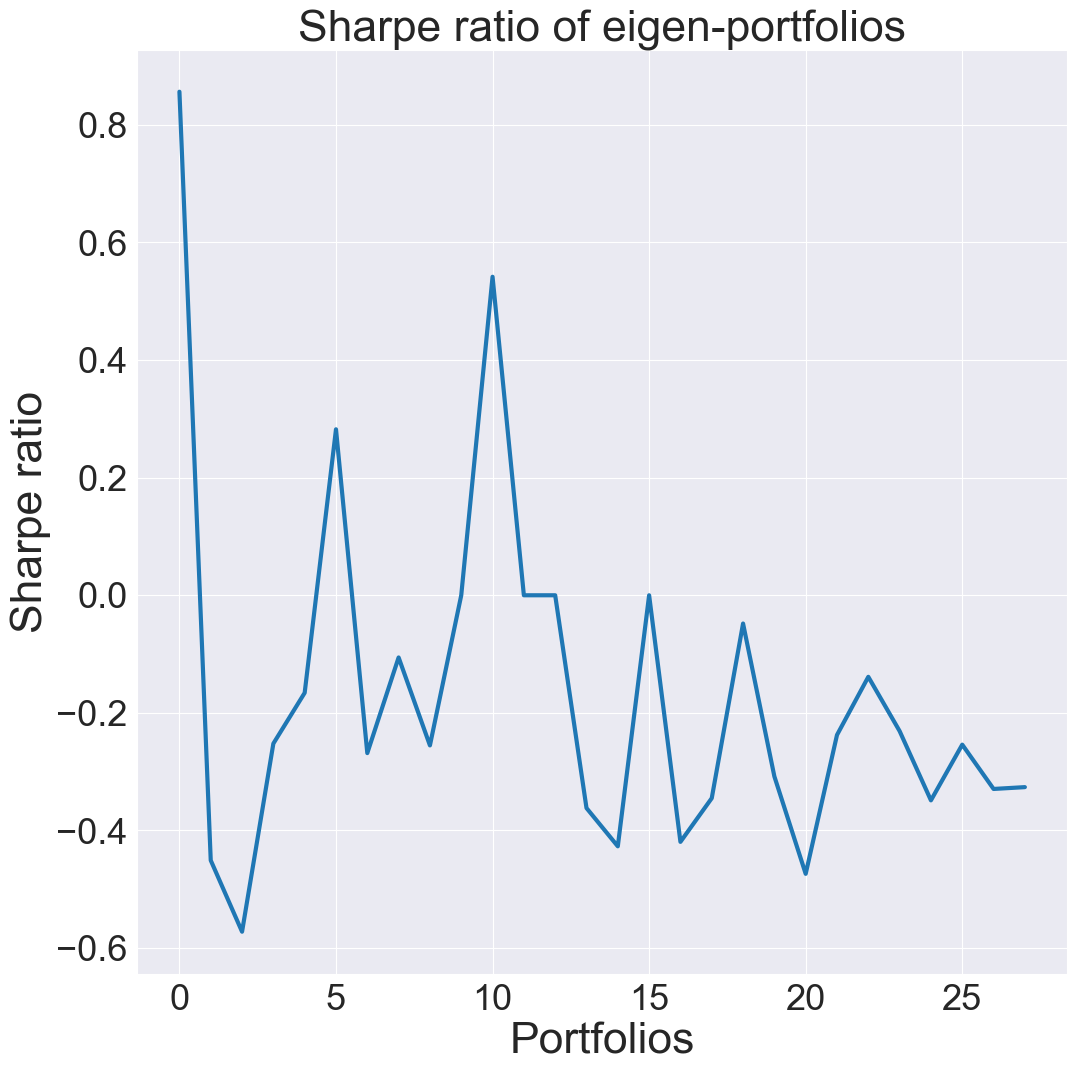

In [55]:
def optimizedPortfolio():
    n_portfolios = len(djia_pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0
    djia_stock_tickers = rescaled_djia_df.columns.values
    n_tickers_djia = len(djia_stock_tickers)
    pcs = djia_pca.components_
    for i in range(n_portfolios):

#        You can apply another two reweighting strategies shown before.
        pc_w = pcs[i] / sum(pcs[i])

        eigen_prtfi = pd.DataFrame(data ={"weights": pc_w.squeeze()*100}, index = djia_stock_tickers)
        eigen_prti_returns = np.dot(X_train_raw_djia.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw_djia.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

        sharpe_metric= np.nan_to_num(sharpe_metric)

    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print("Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 12)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title("Sharpe ratio of eigen-portfolios", fontsize=32)
    ax.set_ylabel("Sharpe ratio", fontsize=32)
    ax.set_xlabel("Portfolios", fontsize=32)
    ax.tick_params(axis="both", which="major", labelsize=26)

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results)

    plt.show()

optimizedPortfolio()

Sum of weights of current eigen-portfolio 0: 100.00


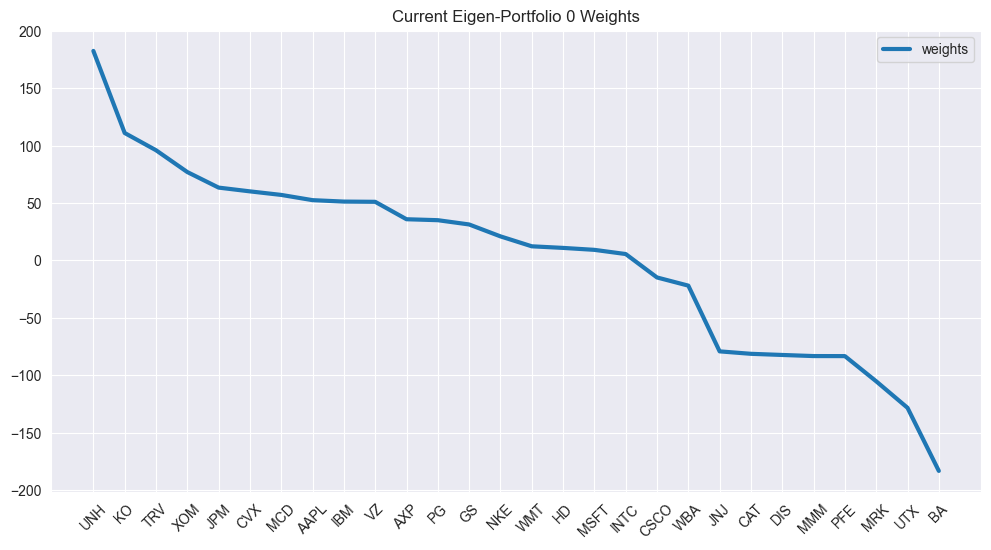

weights
UNH   182.299753
KO    110.895508
TRV    95.891678
XOM    76.907857
JPM    63.372696
CVX    60.096715
MCD    57.008249
AAPL   52.451390
IBM    51.210444
VZ     51.008633
AXP    35.848350
PG     35.022357
GS     31.304611
NKE    20.948549
WMT    12.301448
HD     10.903478
MSFT    9.212884
INTC    5.567527
CSCO  -14.808909
WBA   -21.919176
JNJ   -79.109453
CAT   -81.241087
DIS   -82.240682
MMM   -83.197423
PFE   -83.239370
MRK  -105.151363
UTX  -128.217257
BA   -183.127408

In [57]:
# Visualising the composition of portfolio 0, which has the highest Sharpe ratio

weights = djia_PCWeights()
portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={"weights": weights.squeeze()*100}, index = djia_stock_tickers)
    portfolio.sort_values(by=["weights"], ascending=False, inplace=True)
    if plot:
        print("Sum of weights of current eigen-portfolio 0: %.2f" % np.sum(portfolio))
        portfolio.plot(title="Current Eigen-Portfolio 0 Weights",
            figsize=(12,6),
            xticks=range(0, len(djia_stock_tickers),1),
            rot=45,
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[7], plot=True)

### 1.2.7. Backtesting Eigenportfolios

Current Eigen-Portfolio:
Return = 22.96%
Volatility = 11.35%
Sharpe = 2.02

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


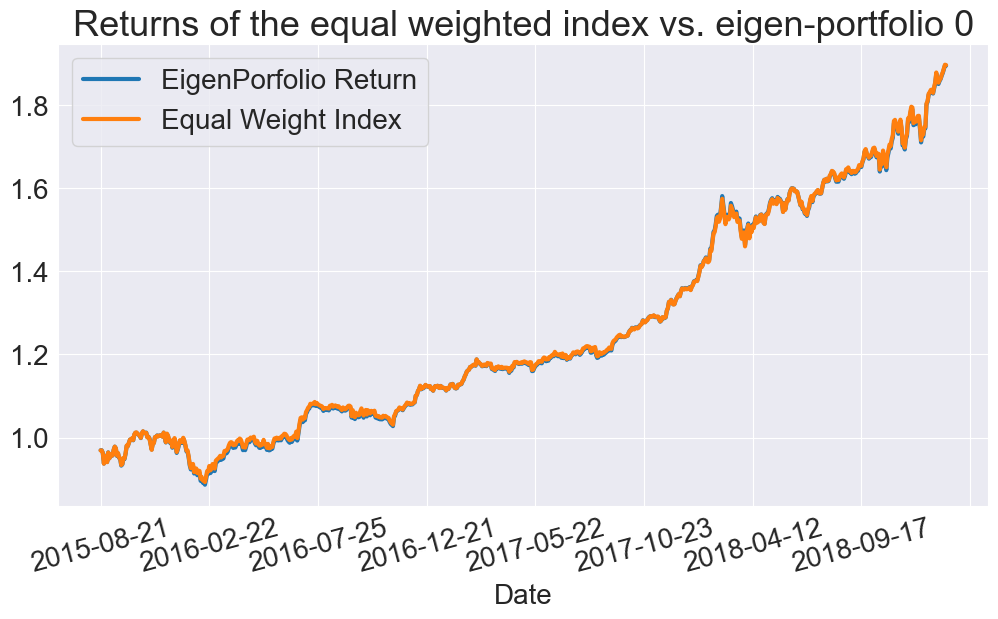

Current Eigen-Portfolio:
Return = -46.58%
Volatility = 78.08%
Sharpe = -0.60

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


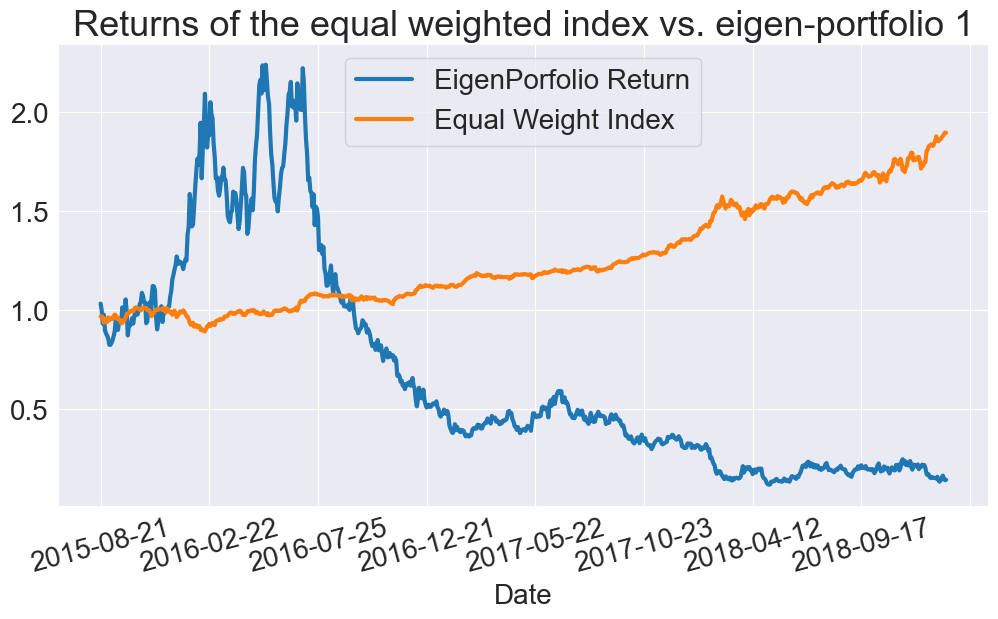

Current Eigen-Portfolio:
Return = -49.47%
Volatility = 108.18%
Sharpe = -0.46

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


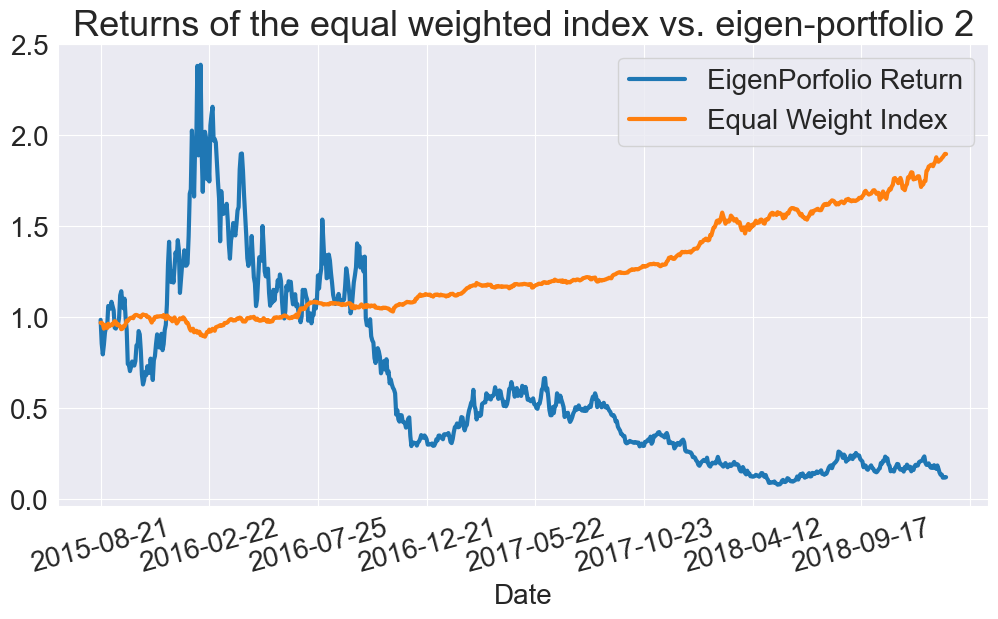

Current Eigen-Portfolio:
Return = -7.75%
Volatility = 77.66%
Sharpe = -0.10

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


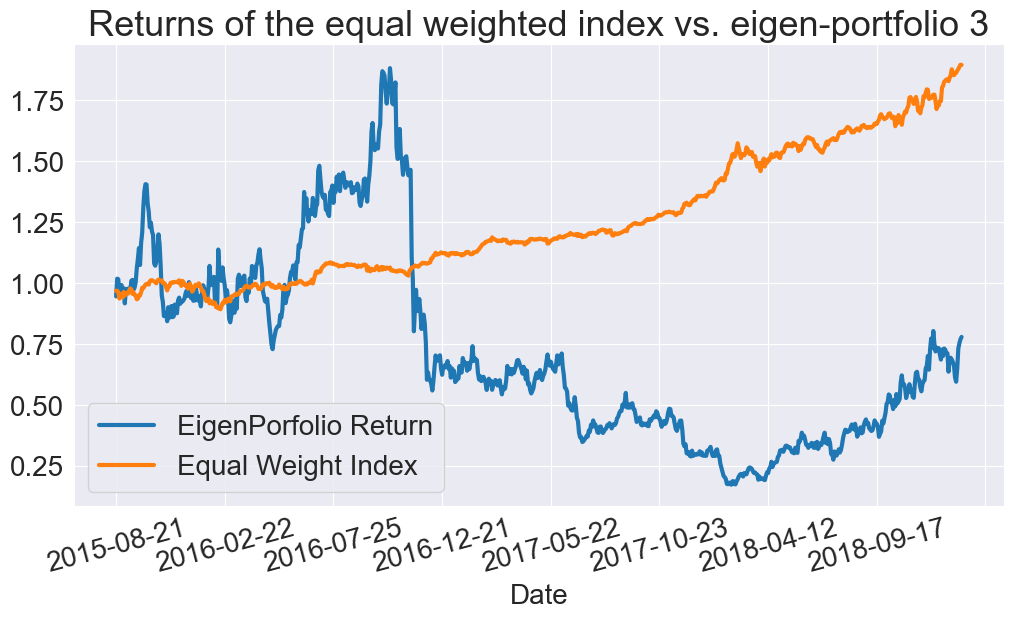

Current Eigen-Portfolio:
Return = 56.66%
Volatility = 108.76%
Sharpe = 0.52

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


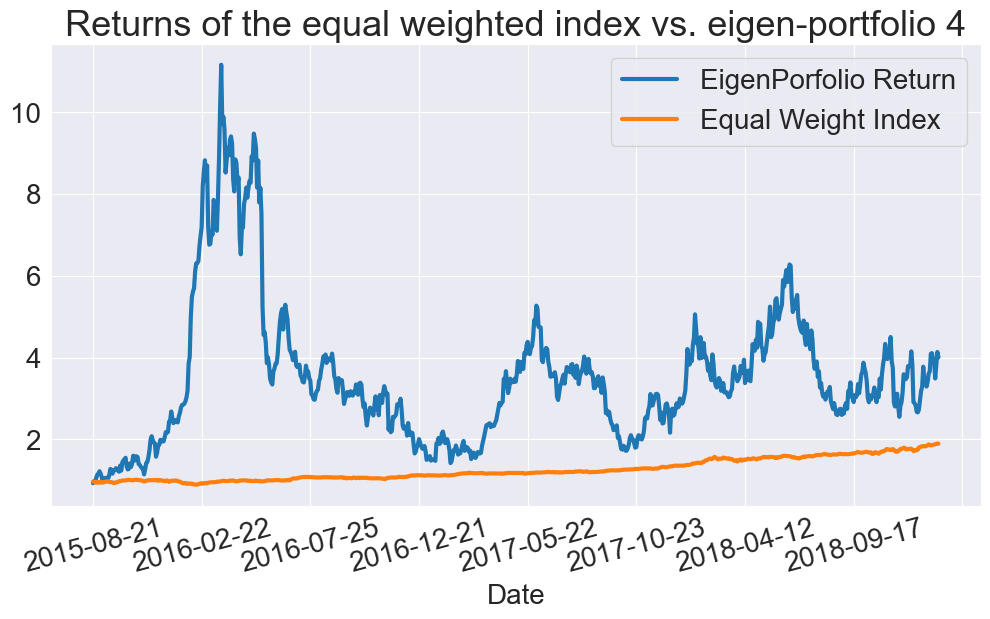

Current Eigen-Portfolio:
Return = 188.84%
Volatility = 93.05%
Sharpe = 2.03

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


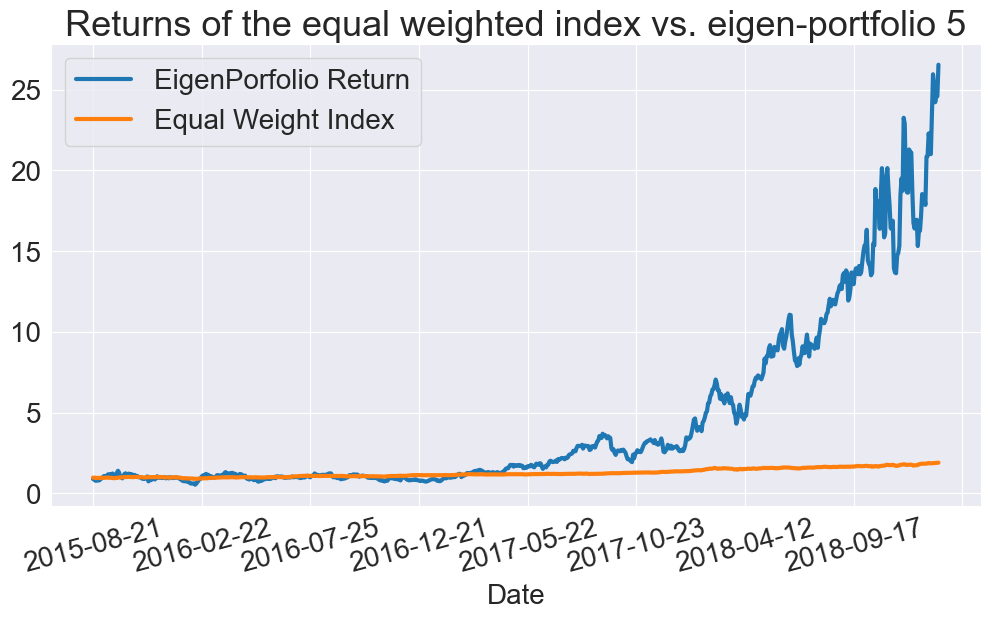

Current Eigen-Portfolio:
Return = 48.60%
Volatility = 151.15%
Sharpe = 0.32

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


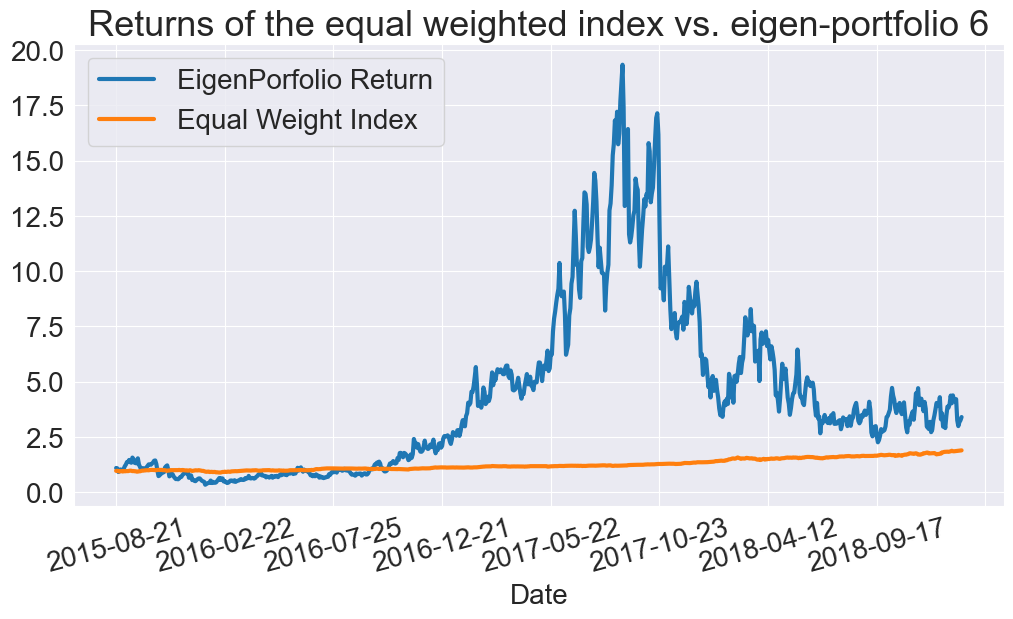

Current Eigen-Portfolio:
Return = -42.36%
Volatility = 63.64%
Sharpe = -0.67

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


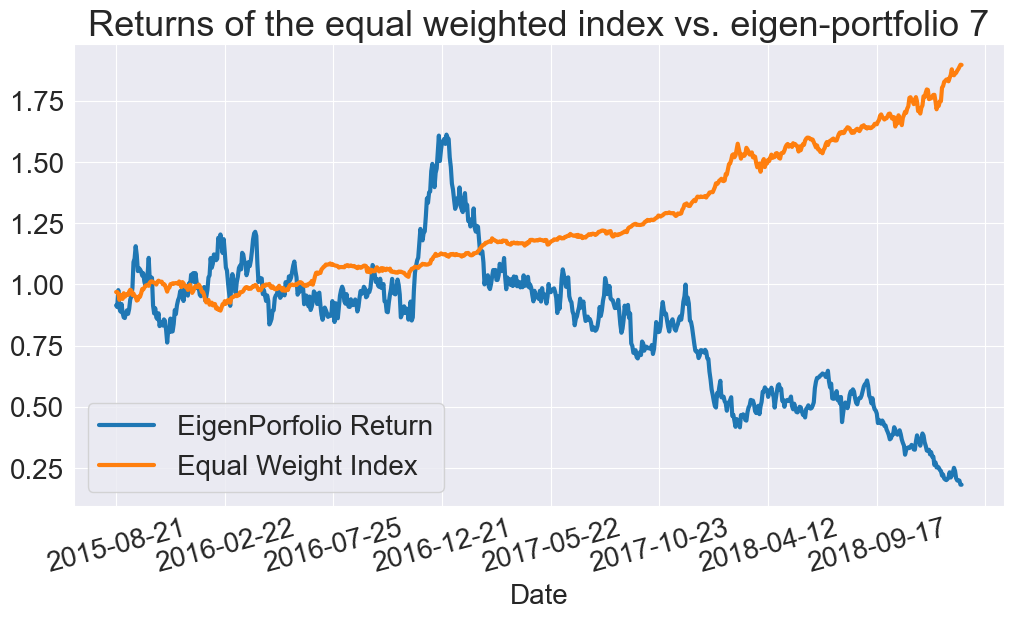

Current Eigen-Portfolio:
Return = -75.75%
Volatility = 119.77%
Sharpe = -0.63

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


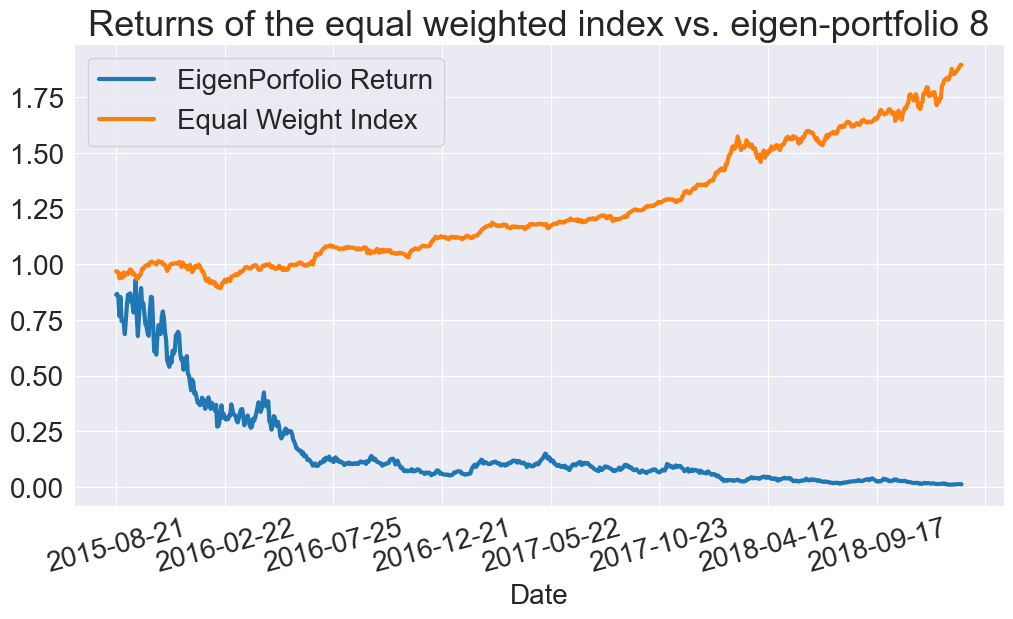

Current Eigen-Portfolio:
Return = -99.85%
Volatility = 306.77%
Sharpe = -0.33

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


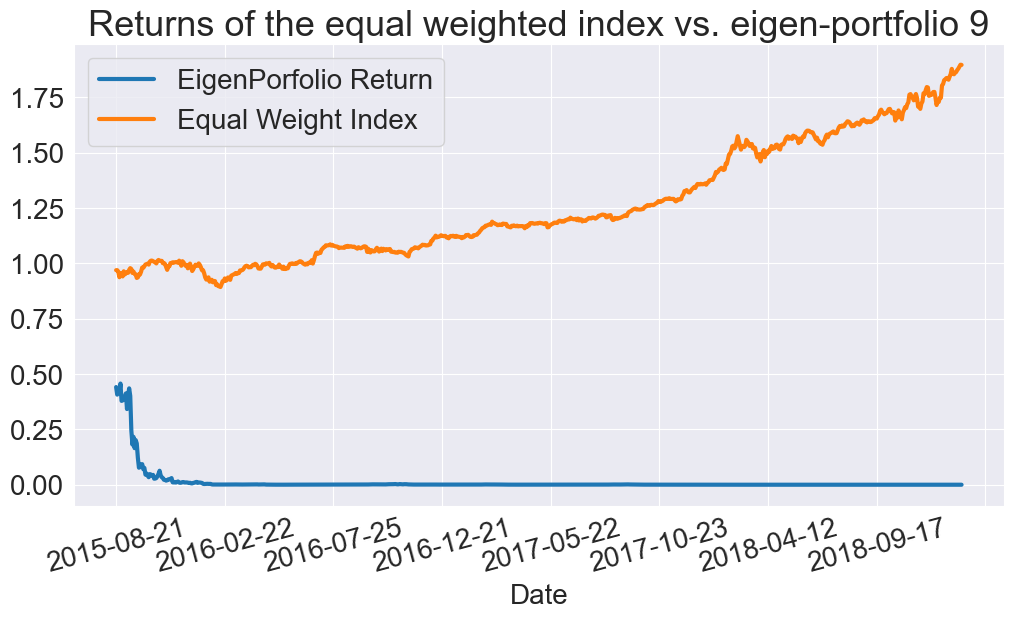

Current Eigen-Portfolio:
Return = -18.84%
Volatility = 67.71%
Sharpe = -0.28

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


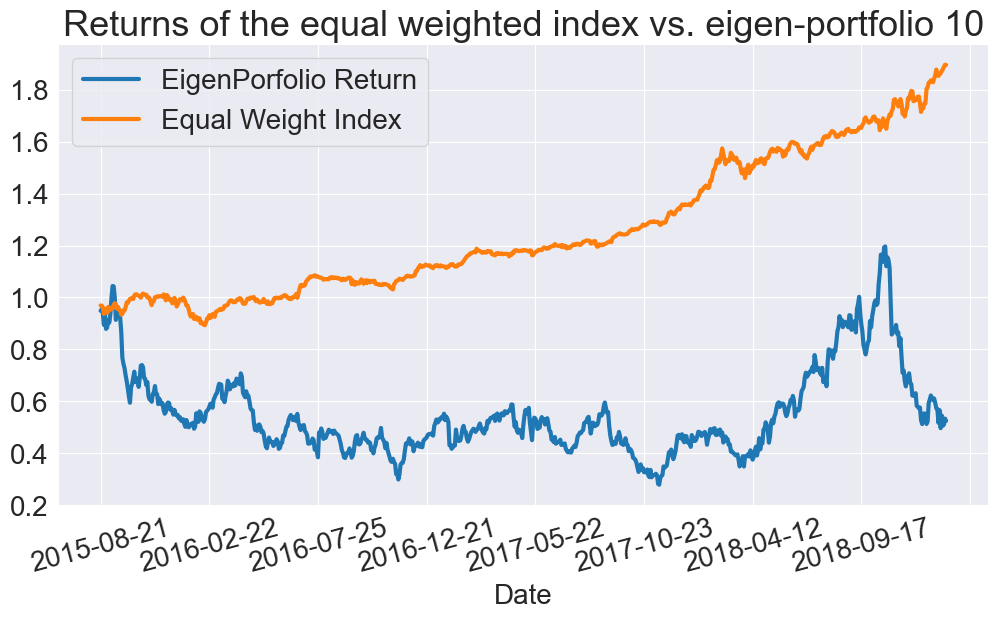

Current Eigen-Portfolio:
Return = -99.53%
Volatility = 382.61%
Sharpe = -0.26

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


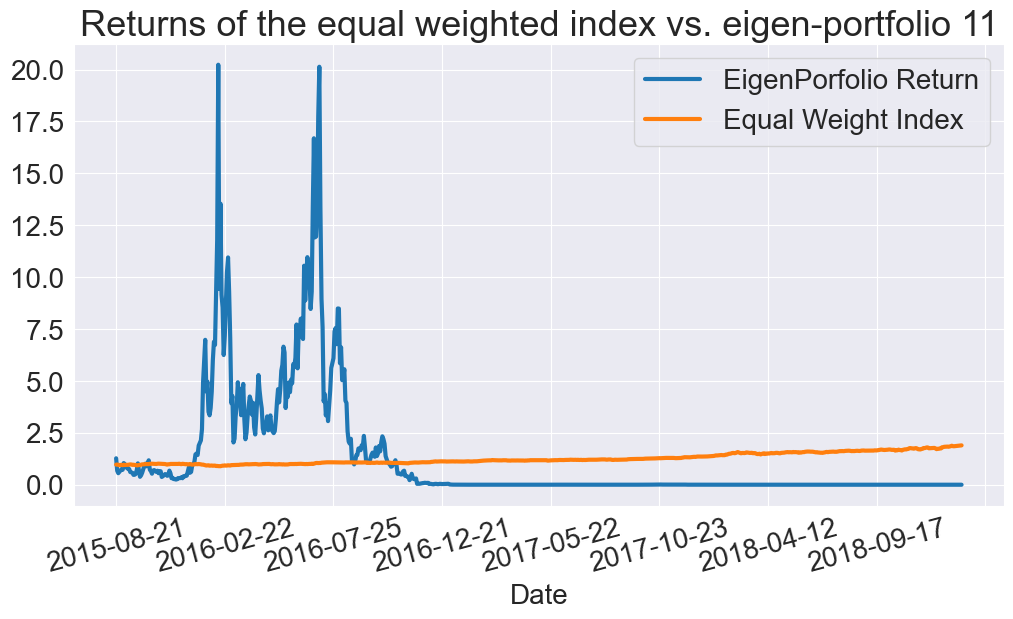

Current Eigen-Portfolio:
Return = -99.97%
Volatility = 347.15%
Sharpe = -0.29

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


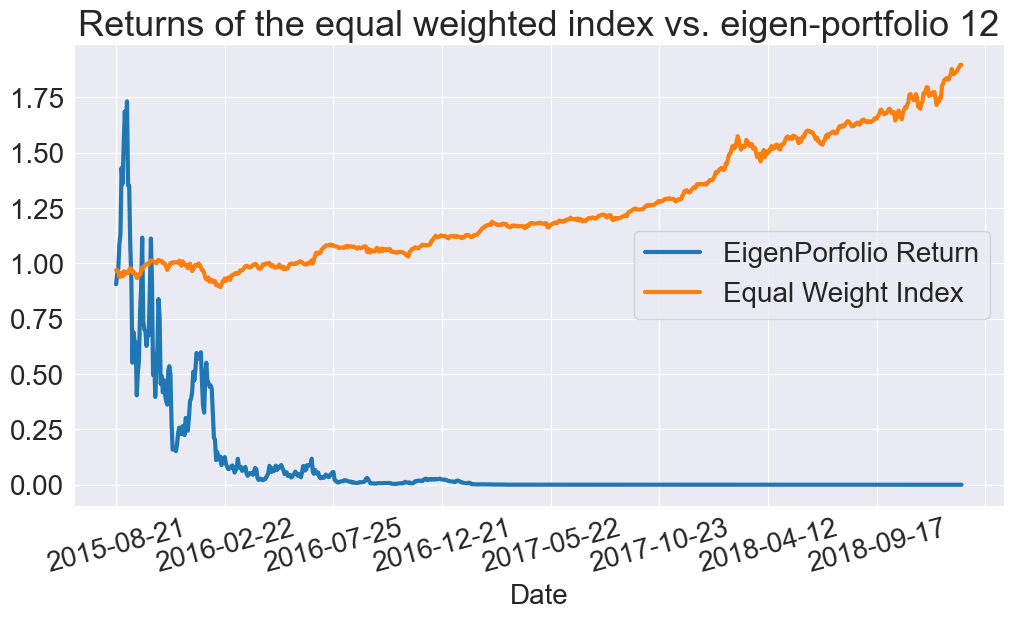

Current Eigen-Portfolio:
Return = -33.79%
Volatility = 124.94%
Sharpe = -0.27

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


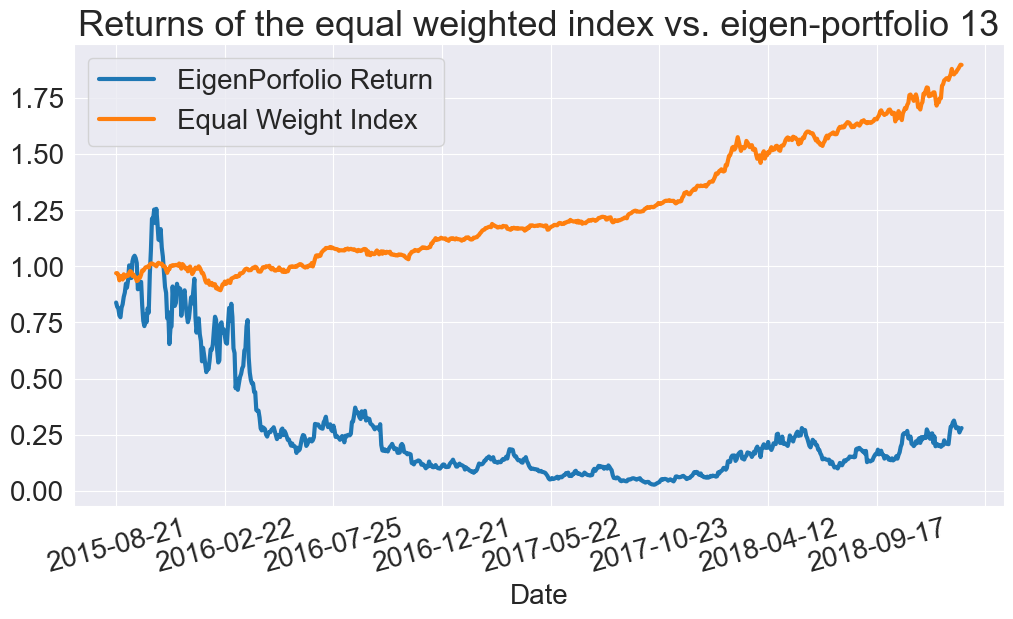

Current Eigen-Portfolio:
Return = 86.26%
Volatility = 185.86%
Sharpe = 0.46

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


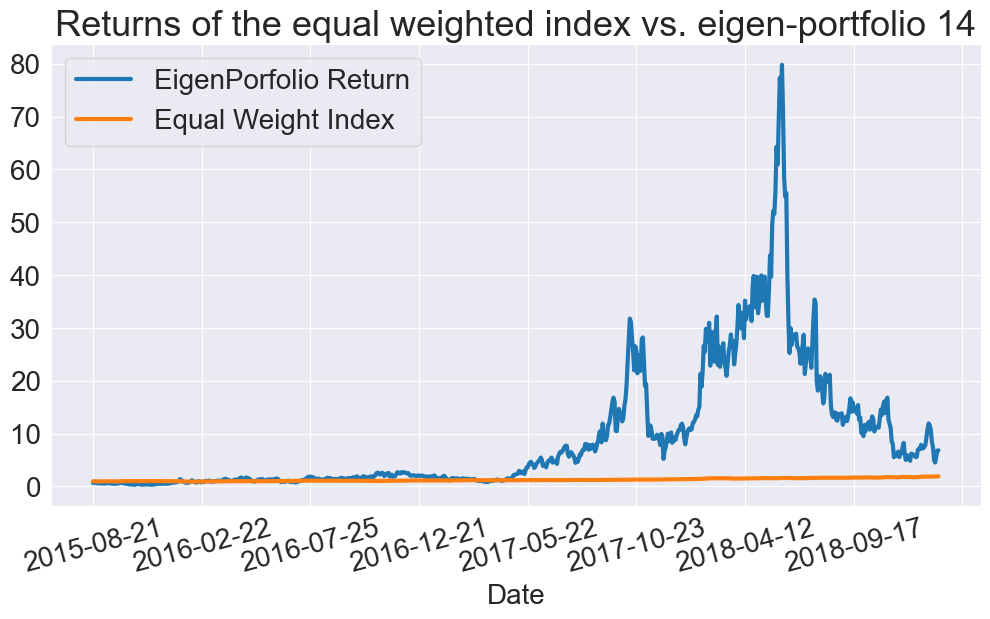

Current Eigen-Portfolio:
Return = -94.07%
Volatility = 239.21%
Sharpe = -0.39

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


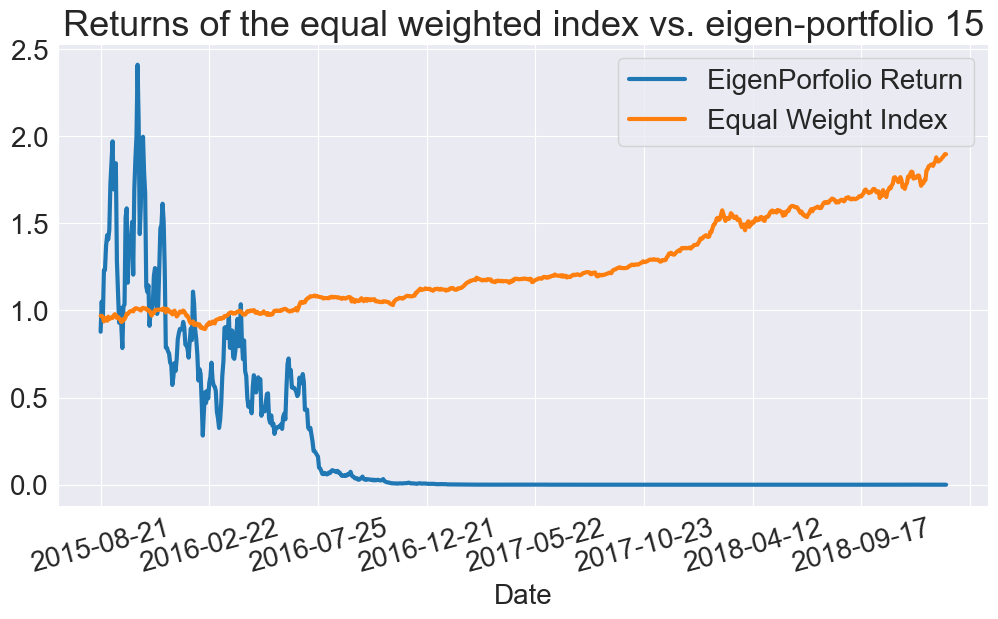

Current Eigen-Portfolio:
Return = -74.51%
Volatility = 179.35%
Sharpe = -0.42

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


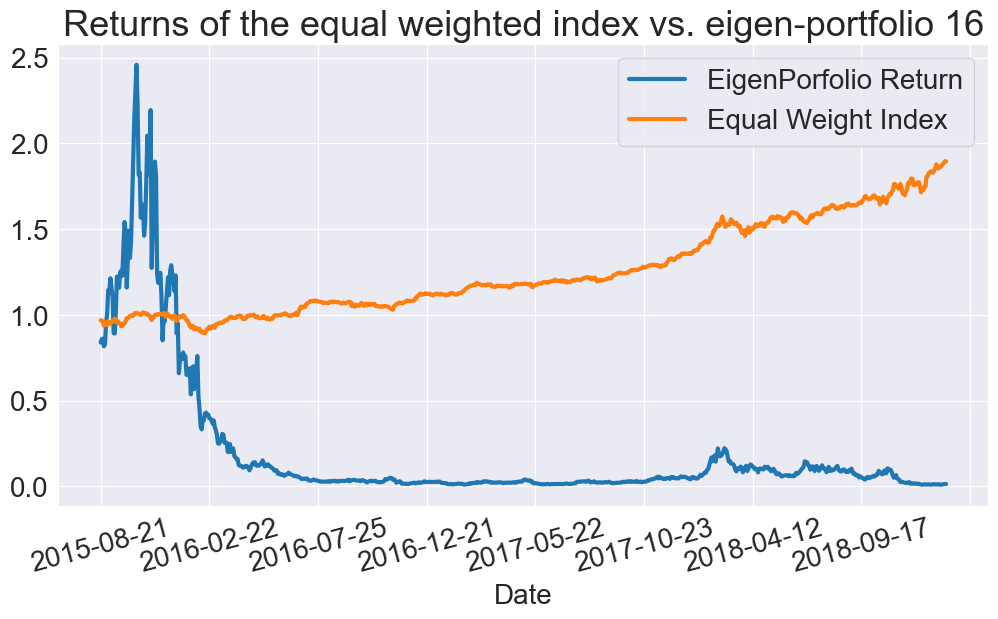

Current Eigen-Portfolio:
Return = -88.65%
Volatility = 224.35%
Sharpe = -0.40

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


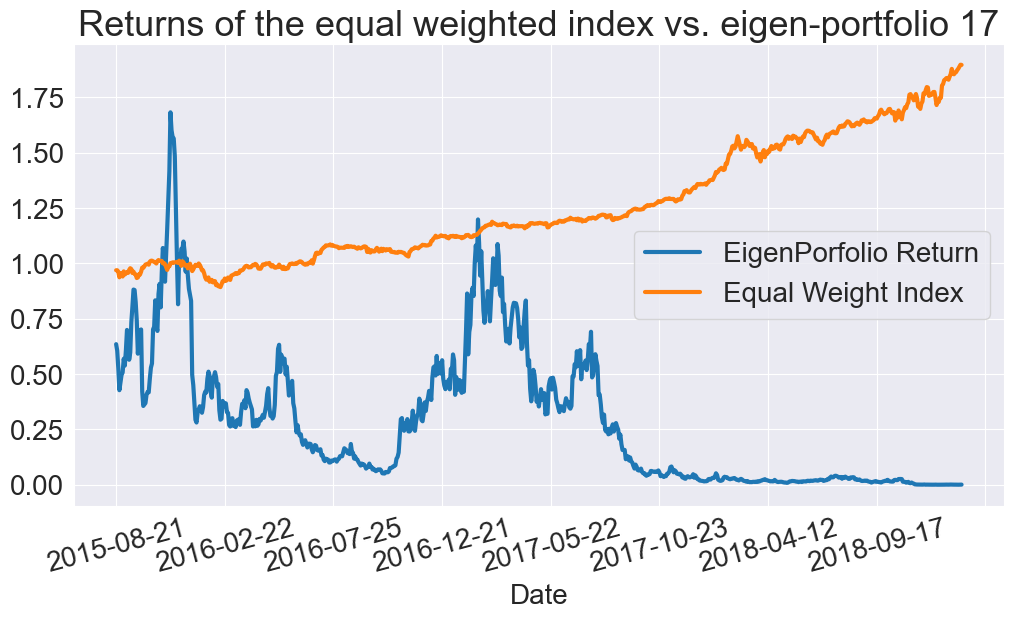

Current Eigen-Portfolio:
Return = nan%
Volatility = 1659.52%
Sharpe = nan

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


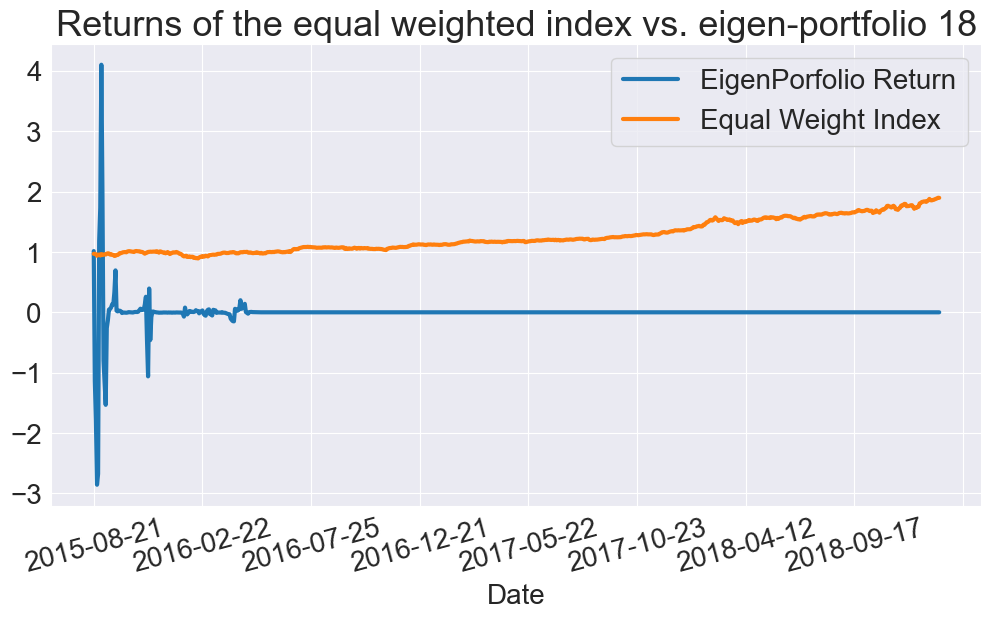

Current Eigen-Portfolio:
Return = -85.31%
Volatility = 279.92%
Sharpe = -0.30

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


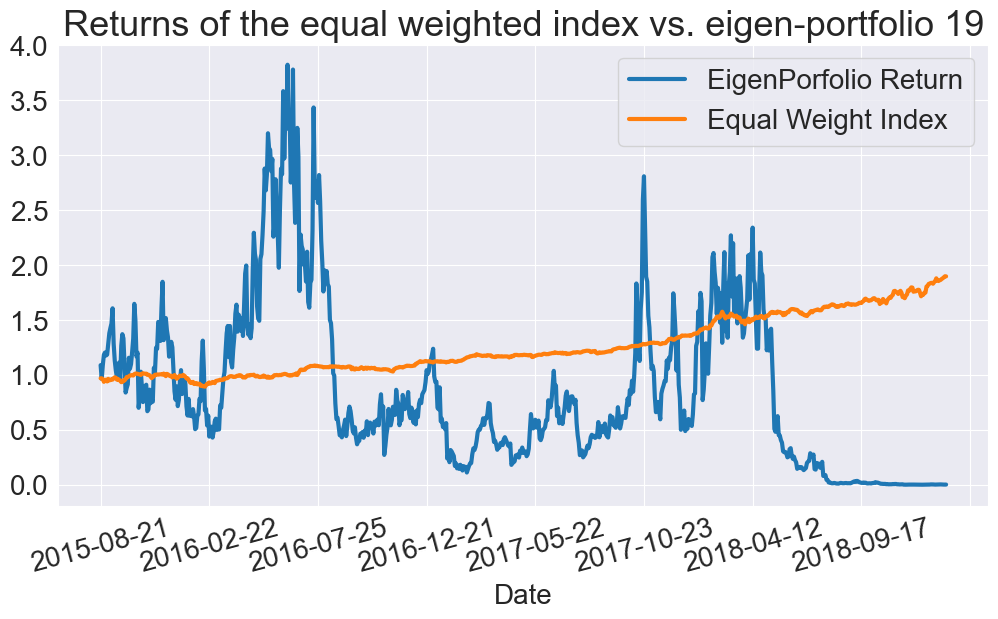

Current Eigen-Portfolio:
Return = -88.80%
Volatility = 137.49%
Sharpe = -0.65

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


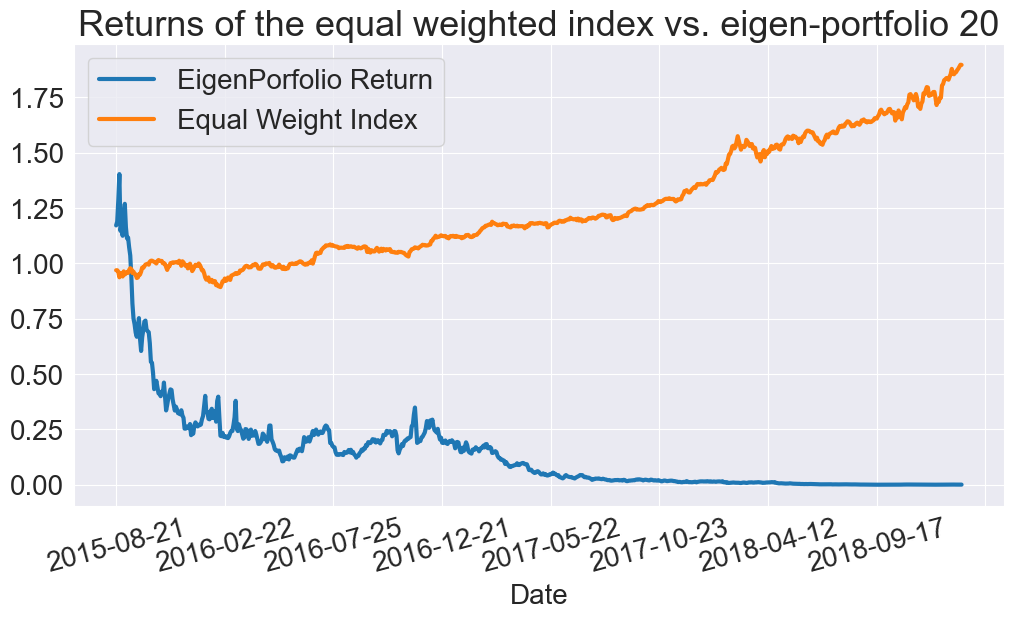

Current Eigen-Portfolio:
Return = 93.06%
Volatility = 90.66%
Sharpe = 1.03

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


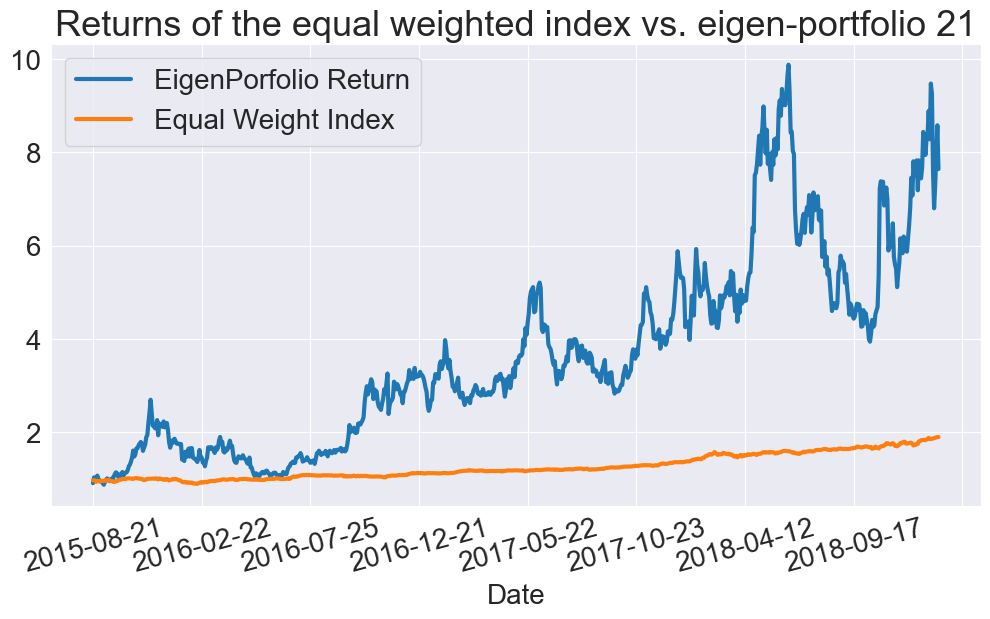

Current Eigen-Portfolio:
Return = -100.00%
Volatility = 555.75%
Sharpe = -0.18

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


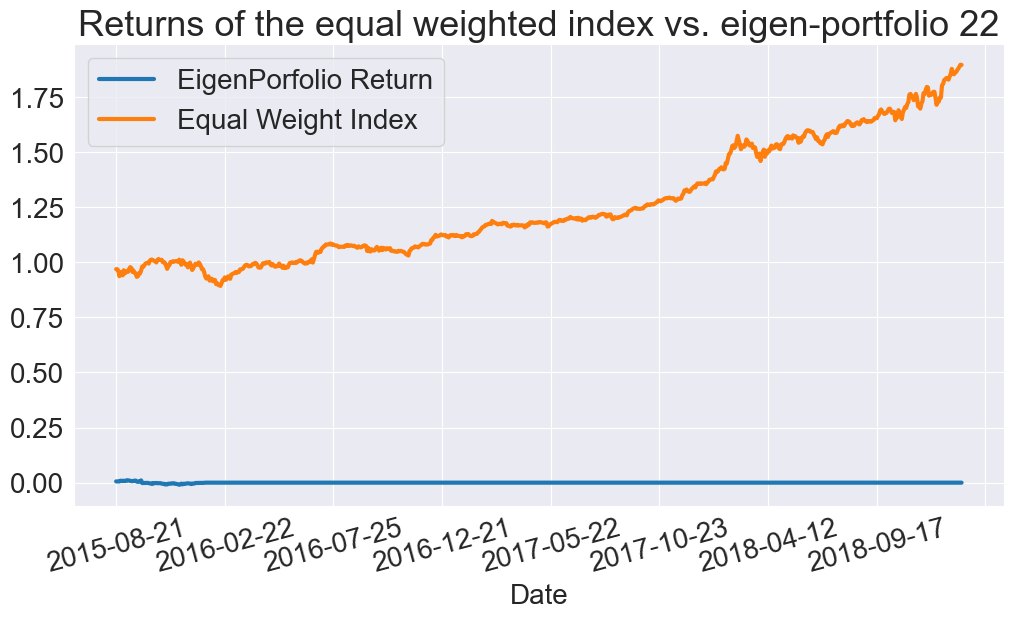

Current Eigen-Portfolio:
Return = -100.00%
Volatility = 355.54%
Sharpe = -0.28

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


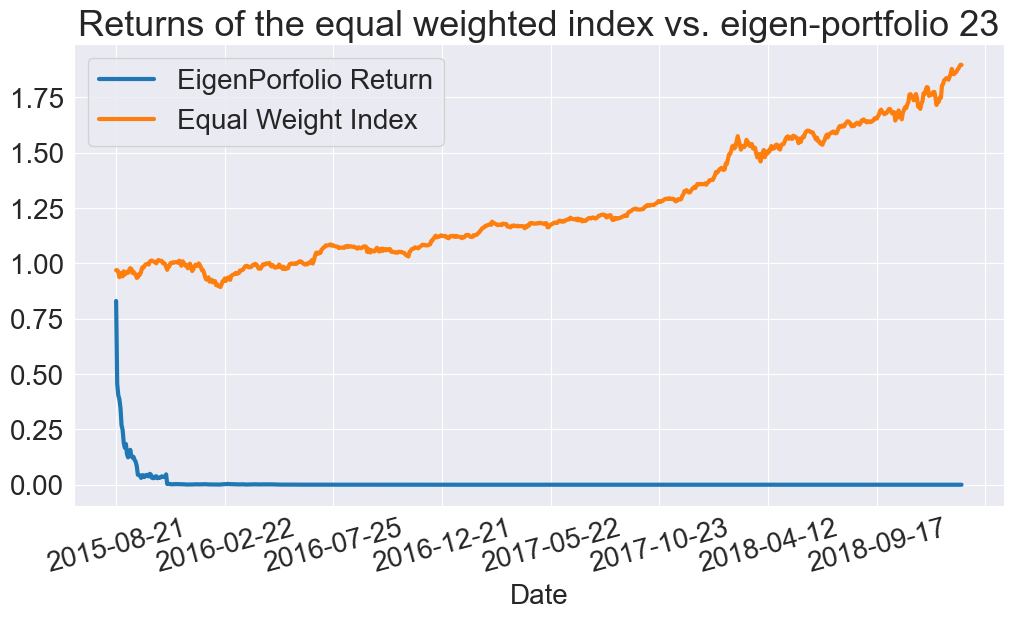

Current Eigen-Portfolio:
Return = 25.53%
Volatility = 115.74%
Sharpe = 0.22

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


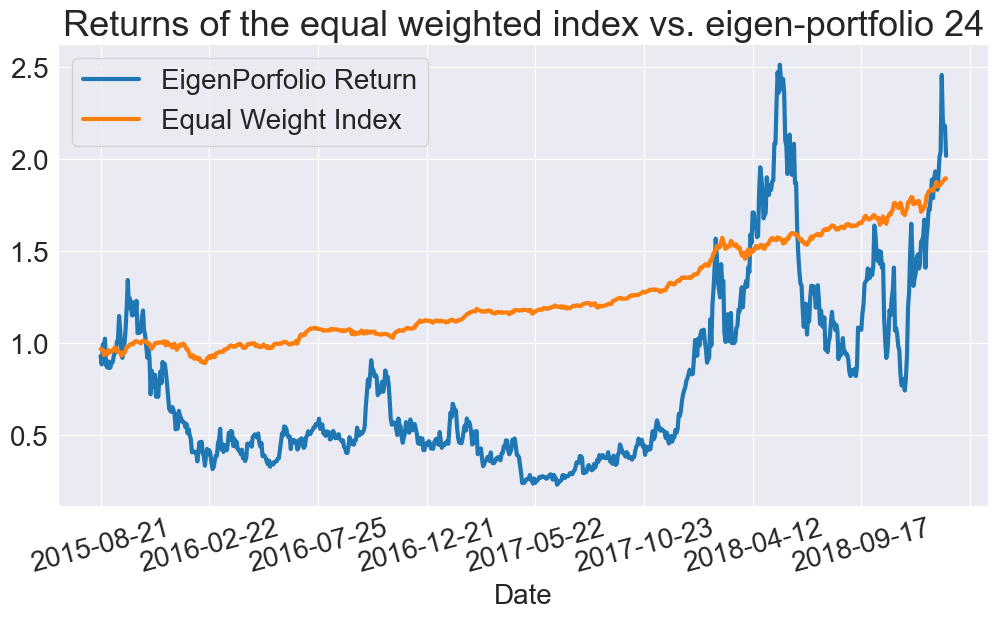

Current Eigen-Portfolio:
Return = -96.40%
Volatility = 359.46%
Sharpe = -0.27

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


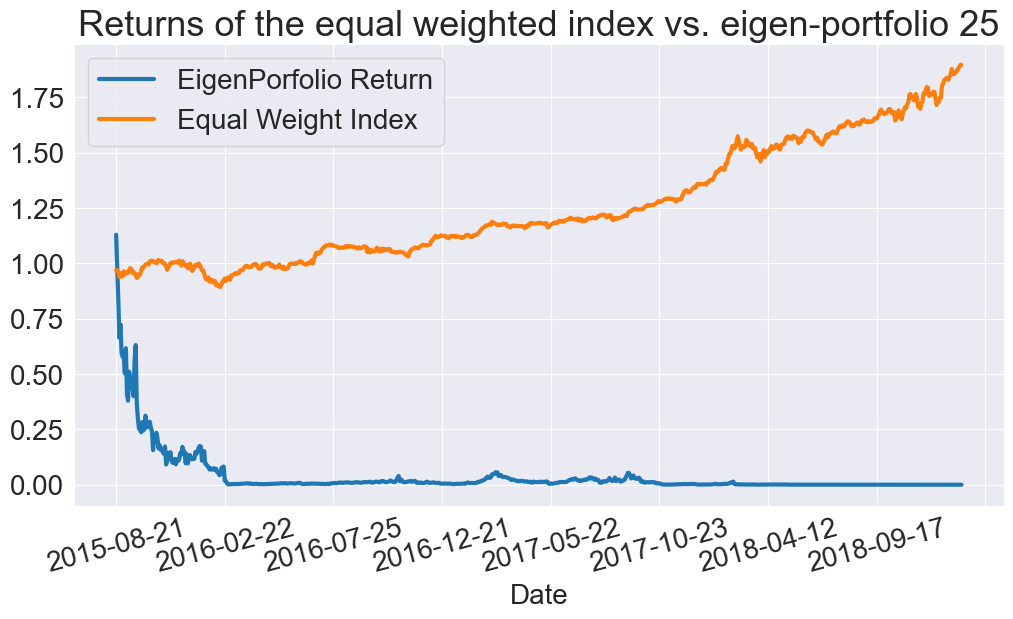

Current Eigen-Portfolio:
Return = -95.37%
Volatility = 176.48%
Sharpe = -0.54

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


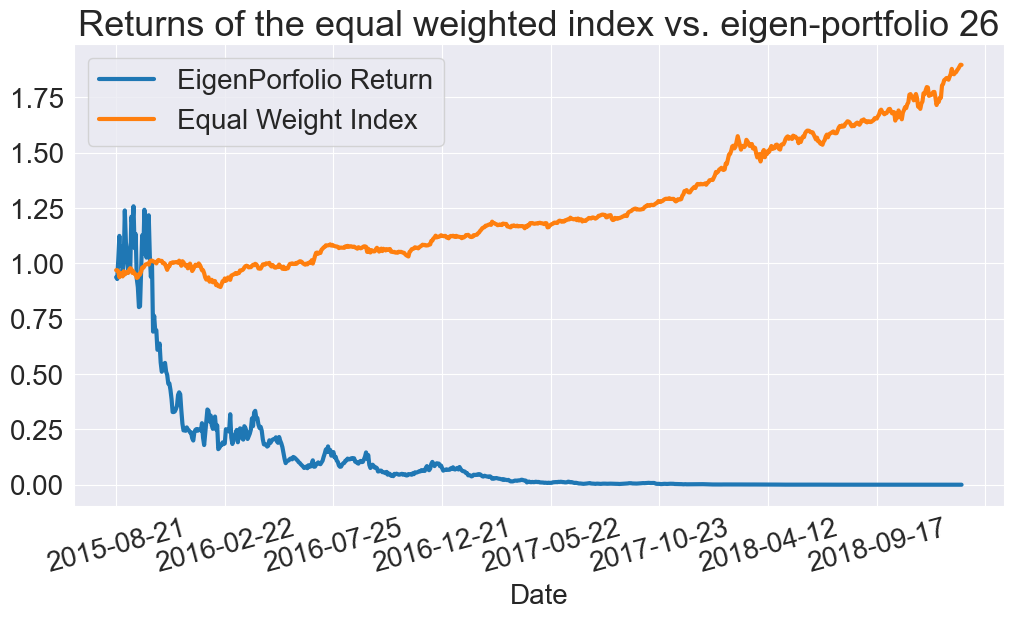

Current Eigen-Portfolio:
Return = 185.12%
Volatility = 139.49%
Sharpe = 1.33

Equal Weight Index:
Return = 22.99%
Volatility = 11.19%
Sharpe = 2.05


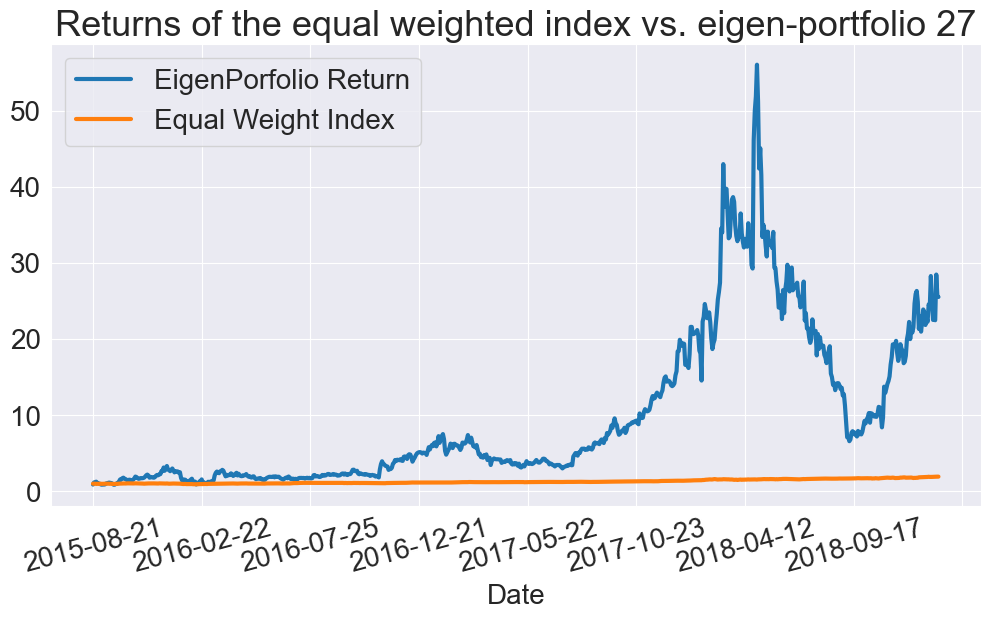

In [67]:
def Backtest(n, eigen):

    """

    Plots Principle components returns against real returns.

    """

    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = djia_stock_tickers)
    eigen_prti_returns = np.dot(X_test_raw_djia.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw_djia.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw_djia * (1/len(djia_pca.components_))).sum(axis=1)
    returns_eq, vol_eq, sharpe_eq = sharpe_ratio(equal_weight_return)
    print('\nEqual Weight Index:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns_eq*100, vol_eq*100, sharpe_eq))
    df_plot = pd.DataFrame({"EigenPorfolio Return": eigen_portfolio_returns, "Equal Weight Index": equal_weight_return}, index=X_test_djia.index)
    np.cumprod(df_plot + 1).plot(figsize=(12,6), linewidth=3)
    plt.legend(fontsize=20)
    plt.title(f"Returns of the equal weighted index vs. eigen-portfolio {str(n)}", fontsize=26)
    plt.xlabel("Date", fontsize=20)
    plt.xticks(fontsize=20, rotation=15)
    plt.yticks(fontsize=20)
    plt.show()


for i in range(len(weights)):
    Backtest(i, eigen=weights[i])
    """
    Top three portfolios in training: 0, 10, 5.
    Bottom three portfolios in training: 1, 20, 22.
    """

# 2. Hierarchical Risk Parity (HRP)

## 2.0. Importing Packages

In [126]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import date

#Import Model Packages
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

#Package for optimization of mean variance optimization
import cvxopt as opt
from cvxopt import blas, solvers

## 2.1. Loading, Describing, and visualising the Data

In [127]:
# load dataset
ftse_df = read_csv("FTSE100_2010_2019.csv", index_col=0)

In [128]:
#Disable the warnings
import warnings
warnings.filterwarnings("ignore")

In [129]:
ftse_df.head()

ABF          AAL     ADM        AHT    ANTO         AVV     AZN   
04/01/2010  822.0  2756.736328  1174.0  82.750000  1026.0  881.338989  2941.0  \
05/01/2010  821.0  2802.026611  1183.0  83.949997  1020.0  894.174011  2907.5   
06/01/2010  820.0  2850.302979  1163.0  83.500000  1038.0  920.699829  2875.0   
07/01/2010  838.5  2830.892822  1154.0  84.849998  1023.0  941.235779  2910.5   
08/01/2010  850.0  2883.648682  1149.0  89.150002  1024.0  936.957519  2908.5   

                    BA        BARC    BATS  ...         CPG        CRDA   
04/01/2010  361.000000  259.156586  2032.0  ...  506.421905  912.651794  \
05/01/2010  366.899994  275.368286  2020.0  ...  505.095886  890.583496   
06/01/2010  371.399994  283.589600  2032.0  ...  512.499512  905.437195   
07/01/2010  371.500000  291.441498  2044.5  ...  504.432892  917.532288   
08/01/2010  368.500000  296.106415  2035.0  ...  508.521393  917.001770   

                    CRH          DCC     DGE         DRX        DSG   EXPN   
04/01/2010  1675.500000  1744.659058  1083.0  420.000000  39.166599  618.5  \
05/01/2010  1615.199951  1766.197998  1063.0  444.000000  39.166599  609.0   
06/01/2010  1574.800049  1783.428955  1060.0  438.299988  39.166599  605.0   
07/01/2010  1543.800049  1809.276001  1067.0  435.100006  46.666599  601.0   
08/01/2010  1562.800049  1822.198975  1067.0  441.600006  39.166599  599.0   

                   FERG   FRES  
04/01/2010  1478.994995  800.0  
05/01/2010  1482.415894  823.0  
06/01/2010  1551.975342  839.5  
07/01/2010  1607.851074  853.0  
08/01/2010  1639.780151  866.0  

[5 rows x 30 columns]

In [130]:
ftse_df.describe()

ABF          AAL          ADM          AHT         ANTO   
count  2526.000000  2526.000000  2526.000000  2526.000000  2526.000000  \
mean   2201.076755  1709.371400  1608.712385  1024.928232   911.034750   
std     802.994484   696.887730   356.593803   731.192853   255.171823   
min     820.000000   220.031204   787.000000    76.949997   346.100006   
25%    1259.500000  1246.976410  1297.250000   262.949989   769.625000   
50%    2436.000000  1637.816834  1572.000000   946.500000   884.500000   
75%    2879.000000  2155.022217  1930.000000  1646.250000  1048.000000   
max    3599.000000  3421.159912  2317.000000  2450.000000  1634.000000   

               AVV          AZN           BA         BARC         BATS  ...   
count  2526.000000  2526.000000  2526.000000  2526.000000  2526.000000  ...  \
mean   1697.330491  4211.157252   453.043380   219.116605  3475.250975  ...   
std     536.051482  1197.512428   111.359231    47.057688   824.864286  ...   
min     861.658630  2543.500000   248.100006   127.199997  1959.000000  ...   
25%    1339.255645  3064.125000   343.100006   174.742504  2905.125000  ...   
50%    1587.533325  4200.000000   454.899994   218.769447  3412.000000  ...   
75%    1935.643494  4909.750000   539.949997   258.450012  3829.625000  ...   
max    3787.939453  7808.000000   677.000000   353.932800  5643.000000  ...   

               CPG         CRDA          CRH          DCC          DGE   
count  2526.000000  2526.000000  2526.000000  2526.000000  2526.000000  \
mean   1153.317561  3113.039668  1869.262407  4267.430438  1989.663185   
std     429.703582  1148.408231   596.470239  2213.983488   607.825719   
min     469.735901   825.227417   907.900024  1421.573975  1000.000000   
25%     735.930725  2394.703369  1364.000000  1916.970947  1654.625000   
50%    1100.320557  2944.952148  1722.400024  3577.000000  1894.000000   
75%    1548.545502  3941.087220  2514.500000  6661.500000  2327.750000   
max    2138.000000  5447.709961  3100.000000  7755.000000  3625.500000   

               DRX          DSG         EXPN         FERG         FRES  
count  2526.000000  2526.000000  2526.000000  2526.000000  2526.000000  
mean    429.370211    73.810961  1278.873419  3907.655419  1167.320561  
std     143.207535    22.925123   483.750435  1383.083997   391.341443  
min     207.600006    20.000000   572.000000  1394.611328   539.599976  
25%     315.074997    58.000000   961.000000  2776.964233   819.000000  
50%     383.000000    74.500000  1158.000000  3729.279297  1095.000000  
75%     540.500000    89.000000  1568.375000  5159.097778  1501.750000  
max     822.500000   124.500000  2631.000000  7070.000000  2150.000000  

[8 rows x 30 columns]

All features have a count of 2526, except for CDI which has 2004 and is missing about 20 percent of is data.

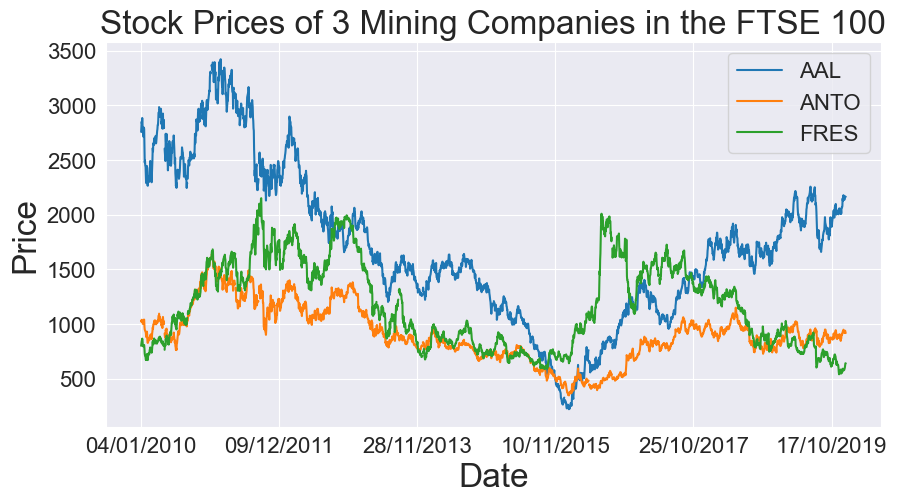

In [138]:
# Visualising the price of three stocks (mining companies)
# AAL: Anglo American plc, British Multinational, world's largest producer of platinum (precious metals/gems in general)
# ANTO: Antofagasta plc, Chilean Multinational, copper mining
# FRES: Fresnillo plc, Mexican, world's largest producer of silver from ore and Mexico's second-largest gold miner
stocks = ["AAL", "ANTO", "FRES"]

# Create a new DataFrame containing only the specified stocks
df = ftse_df[stocks]

# Plot the stock prices on the same chart
df.plot(figsize=(10, 5))
plt.title("Stock Prices of 3 Mining Companies in the FTSE 100", fontsize=24)
plt.xlabel("Date", fontsize=24)
plt.ylabel("Price", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


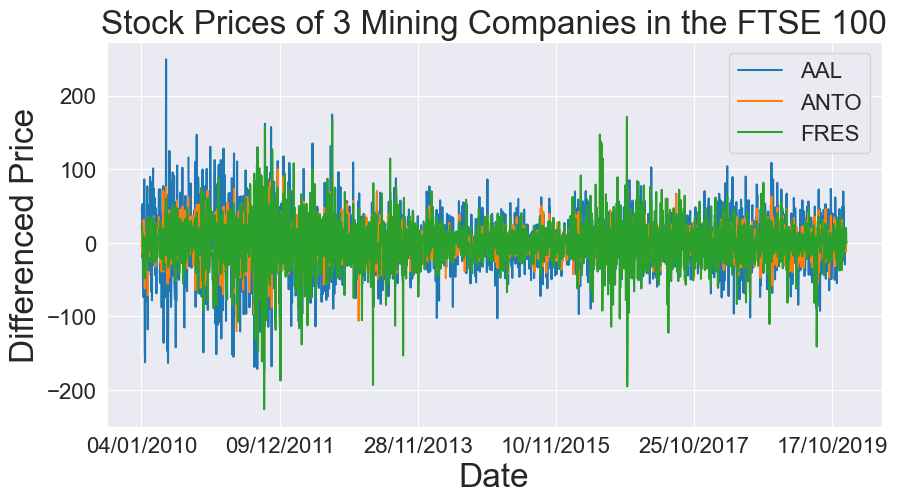

In [143]:
# The same plot but for showing stationarity by differencing the data
df_diff = df.diff()

# Plot the stock prices on the same chart
df_diff.plot(figsize=(10, 5))
plt.title("Stock Prices of 3 Mining Companies in the FTSE 100", fontsize=24)
plt.xlabel("Date", fontsize=24)
plt.ylabel("Differenced Price", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

## 2.2. Data Cleaning and Transformation

In [233]:
# Checking the shape of the data
ftse_df.shape

(2552, 30)

It appears there is at least 26 missing values in all columns of this set. We already know there is no column missing more than 30% of its data so there is no need to check this time.

In [234]:
# Forward filling all missing data in the data set
ftse_df = ftse_df.fillna(method="ffill")
ftse_df.head()

ABF          AAL     ADM        AHT    ANTO         AVV     AZN   
04/01/2010  822.0  2756.736328  1174.0  82.750000  1026.0  881.338989  2941.0  \
05/01/2010  821.0  2802.026611  1183.0  83.949997  1020.0  894.174011  2907.5   
06/01/2010  820.0  2850.302979  1163.0  83.500000  1038.0  920.699829  2875.0   
07/01/2010  838.5  2830.892822  1154.0  84.849998  1023.0  941.235779  2910.5   
08/01/2010  850.0  2883.648682  1149.0  89.150002  1024.0  936.957519  2908.5   

                    BA        BARC    BATS  ...         CPG        CRDA   
04/01/2010  361.000000  259.156586  2032.0  ...  506.421905  912.651794  \
05/01/2010  366.899994  275.368286  2020.0  ...  505.095886  890.583496   
06/01/2010  371.399994  283.589600  2032.0  ...  512.499512  905.437195   
07/01/2010  371.500000  291.441498  2044.5  ...  504.432892  917.532288   
08/01/2010  368.500000  296.106415  2035.0  ...  508.521393  917.001770   

                    CRH          DCC     DGE         DRX        DSG   EXPN   
04/01/2010  1675.500000  1744.659058  1083.0  420.000000  39.166599  618.5  \
05/01/2010  1615.199951  1766.197998  1063.0  444.000000  39.166599  609.0   
06/01/2010  1574.800049  1783.428955  1060.0  438.299988  39.166599  605.0   
07/01/2010  1543.800049  1809.276001  1067.0  435.100006  46.666599  601.0   
08/01/2010  1562.800049  1822.198975  1067.0  441.600006  39.166599  599.0   

                   FERG   FRES  
04/01/2010  1478.994995  800.0  
05/01/2010  1482.415894  823.0  
06/01/2010  1551.975342  839.5  
07/01/2010  1607.851074  853.0  
08/01/2010  1639.780151  866.0  

[5 rows x 30 columns]

No NaN values remaining that need dropping, CDI must have its missing data at the end of the 7 year period as it was probably removed from/replaced in the FTSE 100.

In [235]:
# Defining the train/test splits
X = ftse_df.copy()
ftse_percentage = int(len(X) * 0.8)
X_train_ftse = X[:ftse_percentage]
X_test_ftse = X[ftse_percentage:]

In [236]:
# Calculate percentage return for the training data set
returns_train = X_train_ftse.pct_change().dropna()

In [237]:
#Question: Calculate percentage return for the testing data set
returns_test = X_test_ftse.pct_change().dropna()

## 2.3. Building Dendogram

In [238]:
# Computing correlation-distance matrix from the  correlation matrix
def correlDist(corr):
    """A distance matrix based on correlation, where 0<=d[i,j]<=1"""
    dist = ((1 - corr) / 2.)**.5
    return dist

In [239]:
# Calulate the linkage of the correlation-distance matrix
dist = correlDist(returns_train.corr())  # corr distance between each pair of assets
link = linkage(dist, "ward")  # Computing the linkage matrix using ward method
link[0]

array([1.        , 4.        , 0.50101427, 2.        ])

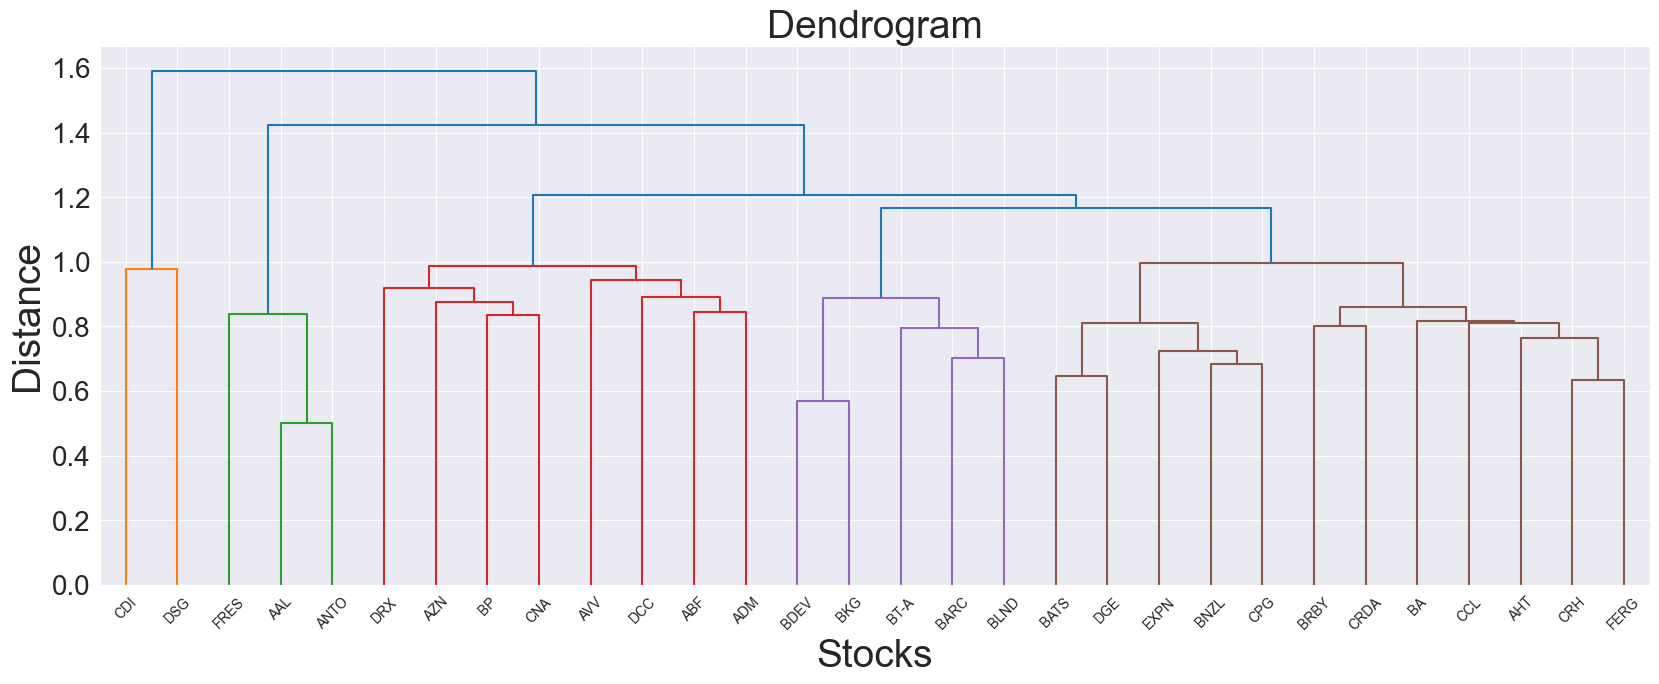

In [240]:
# Plotting the Dendrogram
plt.figure(figsize=(20, 7))
plt.title("Dendrogram", fontsize=28)
plt.xlabel("Stocks", fontsize=28)
plt.ylabel("Distance", fontsize=28)
plt.tick_params(axis="both", which="major", labelsize=20)
dendrogram(link,labels = X.columns)
plt.show()

## 2.4. Training the HRP method

In [241]:
def getQuasiDiag(link):
    """
    Quasi-diagonalization (matrix seriation) to reorganize the covariance matrix such that similar investments are adjacent, and allow for optimal weight distribution after an inverse-variance allocation has been completed.
    """

    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        clusters_df = sortIx[sortIx >= numItems]  # find clusters
        i = clusters_df.index
        j = clusters_df.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        clusters_df = pd.Series(link[j, 1], index=i + 1)
        sortIx = pd.concat([sortIx, clusters_df])  # concatenate the Series and the variable for item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index

    return sortIx.tolist()

In [242]:
def getClusterVar(cov, cluster_Items):
    """
    Function to get the variance per cluster
    """
    cov_ = cov.loc[cluster_Items, cluster_Items]
    w_ = getIVP(cov_).reshape(-1,1)
    cluster_Var = np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cluster_Var

def getRecBipart(cov, sortIx):
    """
    Recursive bisection based on cluster covariance to distributie the HRP allocation
    """
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cluster_Items = [sortIx]  # initialize all items in one cluster
    while len(cluster_Items) > 0:
        cluster_Items = [i[j:k] for i in cluster_Items for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cluster_Items), 2):  # parse in pairs
            cluster_Items0 = cluster_Items[i]  # cluster 1
            cluster_Items1 = cluster_Items[i + 1]  # cluster 2
            cluster_Var0 = getClusterVar(cov, cluster_Items0)
            cluster_Var1 = getClusterVar(cov, cluster_Items1)
            alpha = 1 - cluster_Var0 / (cluster_Var0 + cluster_Var1)
            w[cluster_Items0] *= alpha  # weight 1
            w[cluster_Items1] *= 1 - alpha  # weight 2
    return w

In [243]:
def getIVP(cov, **kargs):
    """
    Computing the inverse-variance portfolio
    """
    ivp = 1.0 / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

In [244]:
def getHRP(cov, corr):
    """
    Constructing the hierarchical portfolio
    """
    dist = correlDist(corr)
    link = sch.linkage(dist, "single")
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    hrp = getRecBipart(cov, sortIx)
    return hrp.sort_index()

In [245]:
def get_all_portfolios(returns):
    """
    Getting the portfolio weights for each type of asset allocation
    """
    cov, corr = returns.cov(), returns.corr()
    hrp = getHRP(cov, corr)
    portfolios = pd.DataFrame([hrp], index=["HRP"]).T
    return portfolios

In [246]:
portfolios = get_all_portfolios(returns_train)

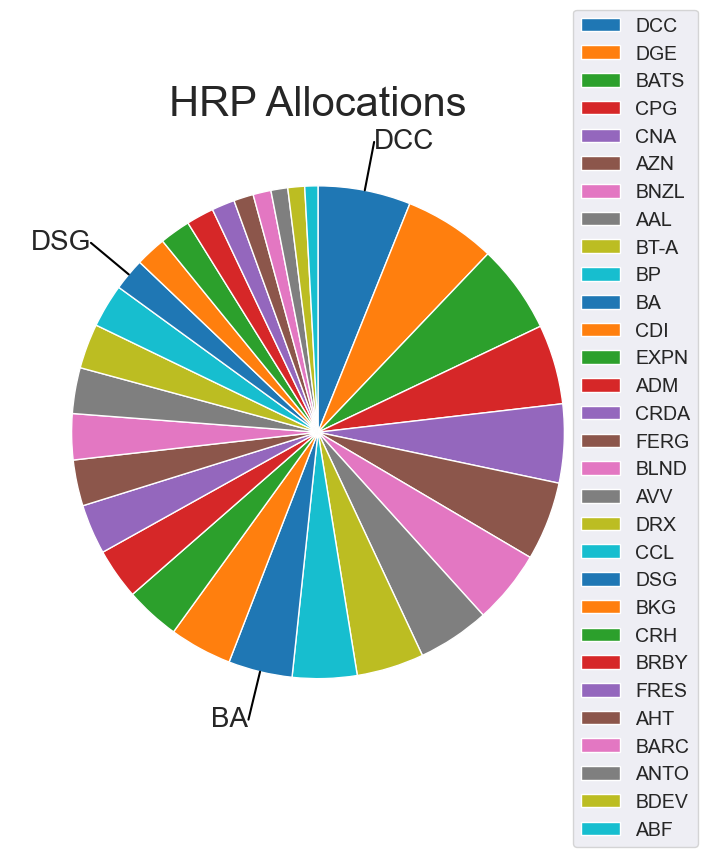

In [247]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

labels = ftse_df.columns.values
sizes = portfolios.iloc[:,0]
idx = sizes.argsort()[::-1]
labels, sizes = labels[idx], sizes[idx]

wedges, texts = ax.pie(sizes, startangle=90, counterclock=False)

# Label every 10th wedge
for i, (wedge, text) in enumerate(zip(wedges, texts)):
    if i % 10 == 0:
        angle = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
        x = np.cos(np.deg2rad(angle))
        y = np.sin(np.deg2rad(angle))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]

        # Draw line from wedge to label
        ax.plot([x, 1.2*x], [y, 1.2*y], color='black', lw=1.5)

        # Add label
        ax.text(1.2*x, 1.2*y, labels[i], ha=horizontalalignment, va='center', fontsize=20)

ax.set_title("HRP Allocations", fontsize = 30)

# Add legend with all labels and their colors
handles, _ = ax.get_legend_handles_labels()
ax.legend(labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=14,
           bbox_transform=plt.gcf().transFigure)
plt.show()


## 2.5. Backtesting

In [248]:
InSample_Result = pd.DataFrame(np.dot(returns_train, np.array(portfolios)), \
                             columns=["HRP"], index = returns_train.index)
InSample_Result_ftse = returns_train.mean(axis=1).cumsum()


OutOfSample_Result = pd.DataFrame(np.dot(returns_test, np.array(portfolios)), \
                                columns=["HRP"], index = returns_test.index)
OutOfSample_Result_ftse = returns_test.mean(axis=1).cumsum()




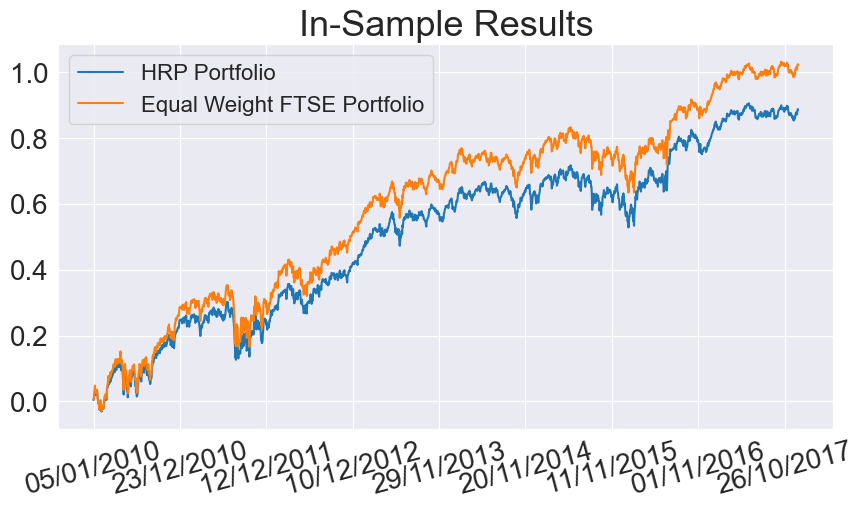

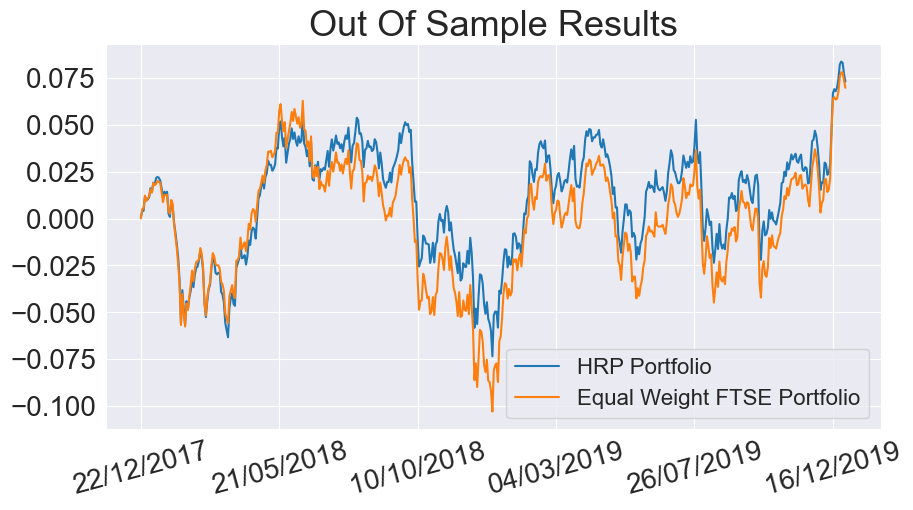

In [255]:
# In sample result of the HRP portfolio
InSample_Result.cumsum().plot(figsize=(10, 5), title ="In-Sample Results", fontsize=20)
# In sample result of the FTSE return, sans HRP weights
InSample_Result_ftse.plot(figsize=(10, 5), fontsize=20)
plt.title("In-Sample Results", fontsize=26)
plt.xticks(fontsize=20, rotation=15)
plt.yticks(fontsize=20)
plt.legend(["HRP Portfolio", "Equal Weight FTSE Portfolio"], fontsize=16)

# Out of sample result of the HRP portfolio
OutOfSample_Result.cumsum().plot(figsize=(10, 5), fontsize=20)
# Out of sample result of the FTSE return, sans HRP weights
OutOfSample_Result_ftse.plot(figsize=(10, 5), title="Out Of Sample Results", fontsize=20)
plt.title("Out Of Sample Results", fontsize=26)
plt.xticks(fontsize=20, rotation=15)
plt.yticks(fontsize=20)
plt.legend(["HRP Portfolio", "Equal Weight FTSE Portfolio"], fontsize=16)


In [250]:
# In sample results
HRP_stddev = InSample_Result.std() * np.sqrt(252)
HRP_sharpe_ratio = (InSample_Result.mean() * np.sqrt(252)) / InSample_Result.std()

ftse_stddev = InSample_Result_ftse.std() * np.sqrt(252)
ftse_sharpe_ratio = (InSample_Result_ftse.mean() * np.sqrt(252)) / InSample_Result_ftse.std()

# Results dataframe
results = pd.DataFrame({"IS Standard Deviation": [HRP_stddev, ftse_stddev],
                        "IS Sharpe Ratio": [HRP_sharpe_ratio, ftse_sharpe_ratio]},
                        index=["HRP", "FTSE"])
results


IS Standard Deviation                 IS Sharpe Ratio
HRP   HRP    0.14264
dtype: float64  HRP    0.768257
dtype: float64
FTSE                       4.476896                        33.44049

The STD and SR for FTSE flat index cant be trusted, I cannot figure out what's going wrong with the calculations.

In [251]:
# In sample results
HRP_stddev = OutOfSample_Result.std() * np.sqrt(252)
HRP_sharpe_ratio = (OutOfSample_Result.mean() * np.sqrt(252)) / OutOfSample_Result.std()

ftse_stddev = OutOfSample_Result_ftse.std() * np.sqrt(252)
ftse_sharpe_ratio = (OutOfSample_Result_ftse.mean() * np.sqrt(252)) / OutOfSample_Result_ftse.std()

# Results dataframe
results = pd.DataFrame({"OOS Standard Deviation": [HRP_stddev, ftse_stddev],
                        "OOS Sharpe Ratio": [HRP_sharpe_ratio, ftse_sharpe_ratio]},
                        index=["HRP", "FTSE"])
results

OOS Standard Deviation                OOS Sharpe Ratio
HRP   HRP    0.114646
dtype: float64  HRP    0.315159
dtype: float64
FTSE                        0.508403                       -0.610853

STD and SR for the out of sample results may well be right, but there is no difference in the calculations between IS and OOS so its better to not trust them as they are likely incorrect even though they appear reasonable.